<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Calculate-Moving-Average" data-toc-modified-id="Calculate-Moving-Average-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate Moving Average</a></span></li><li><span><a href="#Set-threshold-to-detect-outliers" data-toc-modified-id="Set-threshold-to-detect-outliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set threshold to detect outliers</a></span><ul class="toc-item"><li><span><a href="#Threshold-setting-method:-k-std-devs" data-toc-modified-id="Threshold-setting-method:-k-std-devs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Threshold setting method: k-std devs</a></span><ul class="toc-item"><li><span><a href="#Calculate-F1-score-of-this-result(702)" data-toc-modified-id="Calculate-F1-score-of-this-result(702)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Calculate F1 score of this result(702)</a></span></li></ul></li><li><span><a href="#Threshold-setting-method:-Manual" data-toc-modified-id="Threshold-setting-method:-Manual-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Threshold setting method: Manual</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#How-to-check-common-rows-between-two-dataframes" data-toc-modified-id="How-to-check-common-rows-between-two-dataframes-3.2.0.1"><span class="toc-item-num">3.2.0.1&nbsp;&nbsp;</span>How to check common rows between two dataframes</a></span></li></ul></li><li><span><a href="#Calculate-F1-score-of-this-result(546)" data-toc-modified-id="Calculate-F1-score-of-this-result(546)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Calculate F1 score of this result(546)</a></span></li><li><span><a href="#Do-this-in-a-loop" data-toc-modified-id="Do-this-in-a-loop-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Do this in a loop</a></span></li><li><span><a href="#Do-this-in-a-loop-after-Standardizing-the-Data" data-toc-modified-id="Do-this-in-a-loop-after-Standardizing-the-Data-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Do this in a loop after Standardizing the Data</a></span></li></ul></li></ul></li><li><span><a href="#Stationary-transformation-by-differencing" data-toc-modified-id="Stationary-transformation-by-differencing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stationary transformation by differencing</a></span></li><li><span><a href="#Exponential-Moving-Average" data-toc-modified-id="Exponential-Moving-Average-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exponential Moving Average</a></span></li><li><span><a href="#Moving-Average-Model-vs-Moving-Average" data-toc-modified-id="Moving-Average-Model-vs-Moving-Average-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Moving Average Model vs Moving Average</a></span></li><li><span><a href="#Training-an-ARMA-model.-In-a-loop.-With-Standardization" data-toc-modified-id="Training-an-ARMA-model.-In-a-loop.-With-Standardization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training an ARMA model. In a loop. With Standardization</a></span></li></ul></div>

# Read Data

In [2]:
import os
print(os.getcwd())
import pandas as pd
from matplotlib import pyplot as plt
import glob
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from math import sqrt

/media/sanketm/Data1/Temp/time-series/code


In [3]:
start_time = datetime.now()
all_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.004454


In [3]:
all_csv[0]

'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\\synthetic_1.csv'

In [4]:
all_csv[0].split("/")[5].replace('\\','').split(".")[0]

'A2Benchmarksynthetic_1'

In [5]:
df= pd.read_csv(all_csv[0])
df

timestamp       value  is_anomaly
0     1416726000   13.894031           0
1     1416729600   33.578274           0
2     1416733200   88.933746           0
3     1416736800  125.389424           0
4     1416740400  152.962000           0
...          ...         ...         ...
1416  1421823600 -141.419766           0
1417  1421827200 -139.657834           0
1418  1421830800  -70.550652           0
1419  1421834400  -16.857148           0
1420  1421838000    7.757660           0

[1421 rows x 3 columns]

In [6]:
df.describe()

timestamp        value   is_anomaly
count  1.421000e+03  1421.000000  1421.000000
mean   1.419282e+09     6.368346     0.002815
std    1.477266e+06   987.768206     0.053000
min    1.416726e+09 -1421.039008     0.000000
25%    1.418004e+09  -976.854162     0.000000
50%    1.419282e+09    12.969502     0.000000
75%    1.420560e+09   989.025992     0.000000
max    1.421838e+09  1416.912543     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1421 non-null   int64  
 1   value       1421 non-null   float64
 2   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds

In [9]:
df_indexed = df.set_index('timestamp')

print(df_indexed.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2014-11-23 07:00:00 to 2015-01-21 11:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       1421 non-null   float64
 1   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 33.3 KB
None


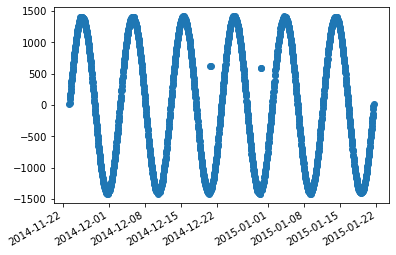

In [10]:
plt.plot_date(df['timestamp'],df['value'])
plt.gcf().autofmt_xdate()


In [11]:
values = pd.DataFrame(df.value)
corrmat = pd.concat([values.shift(1),values],axis =1)
corrmat.columns = ['t-1','t']
result = df.corr()
print(result)

               value  is_anomaly
value       1.000000    0.032058
is_anomaly  0.032058    1.000000


In [12]:
df[df['is_anomaly'] > 0]

timestamp       value  is_anomaly
658 2014-12-20 17:00:00  616.412915           1
659 2014-12-20 18:00:00  616.412915           1
893 2014-12-30 12:00:00  587.893627           1
894 2014-12-30 13:00:00  587.893627           1

# Calculate Moving Average

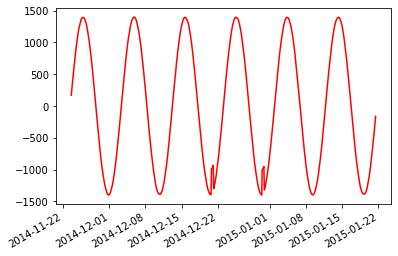

In [80]:
# Tail-rolling average transform
rolling = df.rolling(window=10)
rolling_mean = rolling.mean()

# plot original and transformed dataset
plt.plot_date(df['timestamp'],rolling_mean.value,color="red",fmt="-")
plt.gcf().autofmt_xdate()
#rolling_mean.plot(color='red')
plt.show()



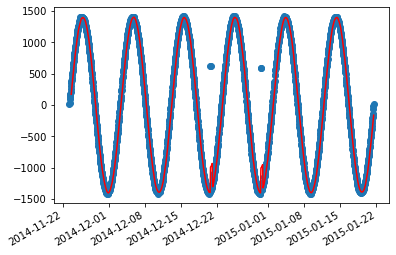

In [14]:
plt.plot_date(df['timestamp'],df['value'])
plt.plot_date(df['timestamp'],rolling_mean.value,color="red",fmt="-")
plt.gcf().autofmt_xdate()

# Set threshold to detect outliers

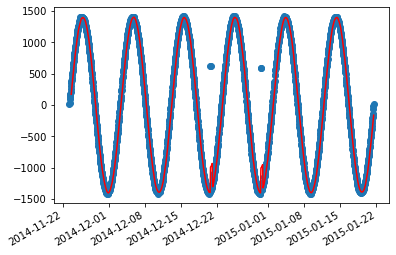

In [15]:
plt.plot_date(df['timestamp'],df['value'])
plt.plot_date(df['timestamp'],rolling_mean.value,color="red",fmt="-")
plt.gcf().autofmt_xdate()

## Threshold setting method: k-std devs

In [16]:
upper_threshold = rolling_mean.value.mean() + rolling_mean.value.std()
lower_threshold = rolling_mean.value.mean() - rolling_mean.value.std()
upper_threshold, lower_threshold

(989.8096782941661, -977.047718202562)

In [17]:
MAprediction = pd.concat([df['timestamp'],rolling_mean.value],axis=1)
MAprediction.set_index('timestamp')
MAprediction

timestamp       value
0    2014-11-23 07:00:00         NaN
1    2014-11-23 08:00:00         NaN
2    2014-11-23 09:00:00         NaN
3    2014-11-23 10:00:00         NaN
4    2014-11-23 11:00:00         NaN
...                  ...         ...
1416 2015-01-21 07:00:00 -310.486993
1417 2015-01-21 08:00:00 -279.234057
1418 2015-01-21 09:00:00 -240.701262
1419 2015-01-21 10:00:00 -202.066255
1420 2015-01-21 11:00:00 -163.416445

[1421 rows x 2 columns]

In [18]:
df_indexed.join(MAprediction.set_index('timestamp'),on='timestamp',how='inner',lsuffix='_data',rsuffix='_MA')

value_data  is_anomaly    value_MA
timestamp                                              
2014-11-23 07:00:00   13.894031           0         NaN
2014-11-23 08:00:00   33.578274           0         NaN
2014-11-23 09:00:00   88.933746           0         NaN
2014-11-23 10:00:00  125.389424           0         NaN
2014-11-23 11:00:00  152.962000           0         NaN
...                         ...         ...         ...
2015-01-21 07:00:00 -141.419766           0 -310.486993
2015-01-21 08:00:00 -139.657834           0 -279.234057
2015-01-21 09:00:00  -70.550652           0 -240.701262
2015-01-21 10:00:00  -16.857148           0 -202.066255
2015-01-21 11:00:00    7.757660           0 -163.416445

[1421 rows x 3 columns]

In [19]:
outliers = rolling_mean[rolling_mean.value > upper_threshold]
outliers = outliers.append(rolling_mean[rolling_mean.value < lower_threshold])
print(f"File: {all_csv[0]}")
print("threshold: 500")
print("Outliers:")
print(outliers)

File: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
threshold: 500
Outliers:
            value  is_anomaly
35    1009.940781         0.0
36    1035.040196         0.0
37    1059.800002         0.0
38    1086.300005         0.0
39    1108.902005         0.0
...           ...         ...
1391 -1087.103310         0.0
1392 -1062.332217         0.0
1393 -1038.126277         0.0
1394 -1014.492906         0.0
1395  -987.644823         0.0

[702 rows x 2 columns]


### Calculate F1 score of this result(702)

$$ F_1 = 2 * \frac{precision + recall}{precision * recall} $$

$$precision = \frac{true\ positive}{true\ positive + false\ positive}$$

$$recall = \frac{true\ positive}{true\ positive + false\ negative}$$

## Threshold setting method: Manual

In [34]:
MAprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1421 non-null   datetime64[ns]
 1   value      1412 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.3 KB


In [36]:
checkingmatrix = df_indexed.join(MAprediction.set_index('timestamp'), on='timestamp',how='inner',lsuffix='_data',rsuffix='_prediction')
checkingmatrix

value_data  is_anomaly  value_prediction
timestamp                                                    
2014-11-23 07:00:00   13.894031           0               NaN
2014-11-23 08:00:00   33.578274           0               NaN
2014-11-23 09:00:00   88.933746           0               NaN
2014-11-23 10:00:00  125.389424           0               NaN
2014-11-23 11:00:00  152.962000           0               NaN
...                         ...         ...               ...
2015-01-21 07:00:00 -141.419766           0       -310.486993
2015-01-21 08:00:00 -139.657834           0       -279.234057
2015-01-21 09:00:00  -70.550652           0       -240.701262
2015-01-21 10:00:00  -16.857148           0       -202.066255
2015-01-21 11:00:00    7.757660           0       -163.416445

[1421 rows x 3 columns]

In [45]:
manual_threshold = 1200
outliers = checkingmatrix[checkingmatrix.value_data >= checkingmatrix.value_prediction + manual_threshold]
print(f"File: {all_csv[0]}")
print("threshold: 500")
print("Outliers:")
print(outliers)

File: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
threshold: 500
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00  616.412915           1      -1192.641592
2014-12-20 18:00:00  616.412915           1       -991.261875
2014-12-30 12:00:00  587.893627           1      -1203.121483
2014-12-30 13:00:00  587.893627           1      -1005.510339


In [46]:
#outliers = outliers.append(rolling_mean[rolling_mean.value < -1*(manual_threshold)])

In [47]:
outliers = outliers.drop_duplicates()
outliers

value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00  616.412915           1      -1192.641592
2014-12-20 18:00:00  616.412915           1       -991.261875
2014-12-30 12:00:00  587.893627           1      -1203.121483
2014-12-30 13:00:00  587.893627           1      -1005.510339

#### How to check common rows between two dataframes

In [58]:
checkingmatrix.merge(outliers, how = 'inner' ,indicator=False)

value_data  is_anomaly  value_prediction
0  616.412915           1      -1192.641592
1  616.412915           1       -991.261875
2  587.893627           1      -1203.121483
3  587.893627           1      -1005.510339

###### How to check rows in checkingmatrix that are not in outliers

In [63]:
checkingmatrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

value_data  is_anomaly  value_prediction     _merge
0      13.894031           0               NaN  left_only
1      33.578274           0               NaN  left_only
2      88.933746           0               NaN  left_only
3     125.389424           0               NaN  left_only
4     152.962000           0               NaN  left_only
...          ...         ...               ...        ...
1416 -141.419766           0       -310.486993  left_only
1417 -139.657834           0       -279.234057  left_only
1418  -70.550652           0       -240.701262  left_only
1419  -16.857148           0       -202.066255  left_only
1420    7.757660           0       -163.416445  left_only

[1417 rows x 4 columns]

###### How to check rows in outliers that are not in checking matrix

In [60]:
checkingmatrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']

Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction, _merge]
Index: []

In [ ]:
not_outliers = checkingmatrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'] #checkingmatrix[checkingmatrix.value_data <= checkingmatrix.value_prediction + manual_threshold]

In [ ]:
#not_outliers = not_outliers.append(rolling_mean[rolling_mean.value > -1*(manual_threshold)])

In [64]:
not_outliers = not_outliers.drop_duplicates()

In [68]:
not_outliers

value_data  is_anomaly  value_prediction     _merge
0      13.894031           0               NaN  left_only
1      33.578274           0               NaN  left_only
2      88.933746           0               NaN  left_only
3     125.389424           0               NaN  left_only
4     152.962000           0               NaN  left_only
...          ...         ...               ...        ...
1416 -141.419766           0       -310.486993  left_only
1417 -139.657834           0       -279.234057  left_only
1418  -70.550652           0       -240.701262  left_only
1419  -16.857148           0       -202.066255  left_only
1420    7.757660           0       -163.416445  left_only

[1417 rows x 4 columns]

### Calculate F1 score of this result(546)

$$ F_1 = 2 * \frac{precision + recall}{precision * recall} $$

$$precision = \frac{true\ positive}{true\ positive + false\ positive}$$

$$recall = \frac{true\ positive}{true\ positive + false\ negative}$$

In [30]:
p = len(df[df.is_anomaly == 1])
p

4

In [31]:
n = len(df[df.is_anomaly == 0])
n

1417

In [69]:
checkingmatrix, outliers, not_outliers

(                     value_data  is_anomaly  value_prediction
 timestamp                                                    
 2014-11-23 07:00:00   13.894031           0               NaN
 2014-11-23 08:00:00   33.578274           0               NaN
 2014-11-23 09:00:00   88.933746           0               NaN
 2014-11-23 10:00:00  125.389424           0               NaN
 2014-11-23 11:00:00  152.962000           0               NaN
 ...                         ...         ...               ...
 2015-01-21 07:00:00 -141.419766           0       -310.486993
 2015-01-21 08:00:00 -139.657834           0       -279.234057
 2015-01-21 09:00:00  -70.550652           0       -240.701262
 2015-01-21 10:00:00  -16.857148           0       -202.066255
 2015-01-21 11:00:00    7.757660           0       -163.416445
 
 [1421 rows x 3 columns],
                      value_data  is_anomaly  value_prediction
 timestamp                                                    
 2014-12-20 17:00:00  616.4

In [74]:
#join with original df
#check is_anomaly flag - calc truepos,true neg,fslse pos , false neg
#calc f1
#do oit in for loop
truepositives = outliers[outliers.is_anomaly == 1]
falsepostives = outliers[outliers.is_anomaly == 0]
truenegatives = not_outliers[not_outliers.is_anomaly == 0]
falsenegatives = not_outliers[not_outliers.is_anomaly == 1]

In [78]:
if(len(truepositives) + len(falsepostives) > 0):
    precision = len(truepositives)/(len(truepositives) + len(falsepostives))
    print("Precision: ", precision)
    #precision_plot.append(precision)
else:
    print("truepositives + falsepositives = 0")
    #continue


recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
print("Recall:", recall)
#recall_plot.append(recall)
if(precision + recall > 0):
    f1 = 2*(precision * recall)/(precision + recall)
    print("F1:",f1)
    #f1_plot.append(f1)
else:
    print("precision + recall = 0")
    #continue

Precision:  1.0
Recall: 1.0
F1: 1.0


### Do this in a loop

Processing index: 0 of 100


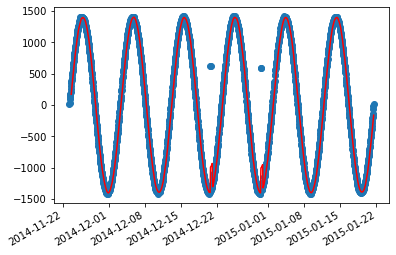

File: A2Benchmarksynthetic_1
threshold:1200
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00  616.412915           1      -1192.641592
2014-12-20 18:00:00  616.412915           1       -991.261875
2014-12-30 12:00:00  587.893627           1      -1203.121483
2014-12-30 13:00:00  587.893627           1      -1005.510339
Precision:  1.0
Recall: 1.0
F1: 1.0


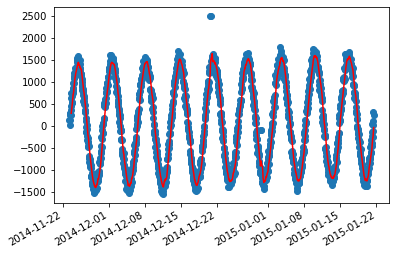

File: A2Benchmarksynthetic_10
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-20 17:00:00  2490.312216           1       1289.218714
Precision:  1.0
Recall: 0.25
F1: 0.4


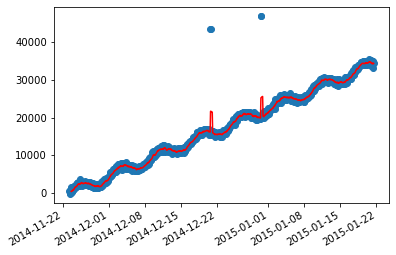

File: A2Benchmarksynthetic_100
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-09 10:00:00  10797.590567           0       9423.694397
2014-12-09 13:00:00  11244.383757           0       9854.059439
2014-12-20 17:00:00  43520.564531           1      18920.859992
2014-12-20 18:00:00  43520.564531           1      21645.679589
2014-12-30 12:00:00  46884.241246           1      22571.251239
2014-12-30 13:00:00  46884.241246           1      25233.730136
2014-12-31 04:00:00  21636.877650           0      20433.414433
2015-01-02 08:00:00  24847.103239           0      23511.638834
2015-01-03 08:00:00  26062.249690           0      24847.571272
Precision:  0.4444444444444444
Recall: 1.0
F1: 0.6153846153846153


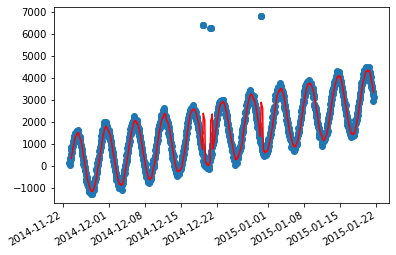

File: A2Benchmarksynthetic_11
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  6424.119302           1       1296.503420
2014-12-19 07:00:00  6424.119302           1       1845.157089
2014-12-19 08:00:00  6424.119302           1       2394.671111
2014-12-20 17:00:00  6273.705277           1        795.858682
2014-12-20 18:00:00  6273.705277           1       1416.175710
2014-12-20 19:00:00  6273.705277           1       2056.708409
2014-12-30 12:00:00  6819.510433           1       1843.638104
2014-12-30 13:00:00  6819.510433           1       2361.762568
2014-12-30 14:00:00  6819.510433           1       2893.294783
Precision:  1.0
Recall: 1.0
F1: 1.0


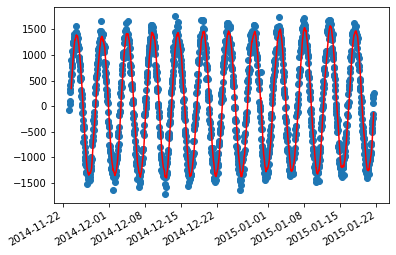

File: A2Benchmarksynthetic_12
threshold:1200
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0


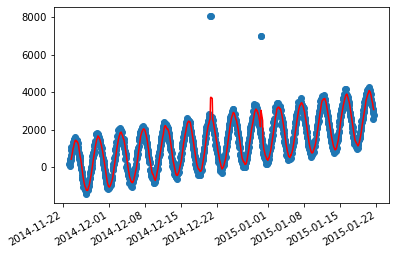

File: A2Benchmarksynthetic_13
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-20 17:00:00  8056.267028           1       3127.002735
2014-12-20 18:00:00  8056.267028           1       3686.073887
2014-12-30 12:00:00  6995.828286           1       2592.549610
2014-12-30 13:00:00  6995.828286           1       3038.975465
Precision:  1.0
Recall: 1.0
F1: 1.0


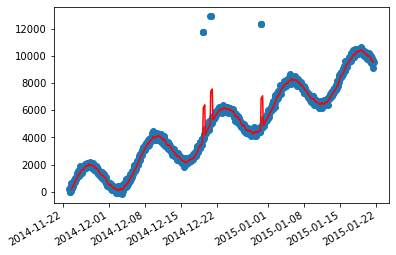

File: A2Benchmarksynthetic_14
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-19 06:00:00  11741.659149           1       4530.016105
2014-12-19 07:00:00  11741.659149           1       5347.301514
2014-12-19 08:00:00  11741.659149           1       6154.702574
2014-12-20 17:00:00  12933.153180           1       5736.868102
2014-12-20 18:00:00  12933.153180           1       6549.055314
2014-12-20 19:00:00  12933.153180           1       7386.611566
2014-12-30 12:00:00  12313.689897           1       5316.113189
2014-12-30 13:00:00  12313.689897           1       6085.947711
2014-12-30 14:00:00  12313.689897           1       6863.514078
Precision:  1.0
Recall: 1.0
F1: 1.0


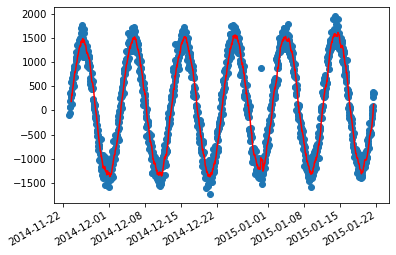

File: A2Benchmarksynthetic_15
threshold:1200
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00  884.662693           1       -978.616407
Precision:  1.0
Recall: 1.0
F1: 1.0


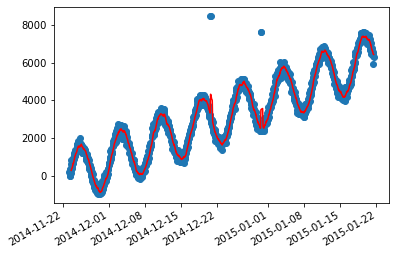

File: A2Benchmarksynthetic_16
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-20 17:00:00  8470.624612           1       3823.832548
2014-12-20 18:00:00  8470.624612           1       4324.235911
2014-12-30 12:00:00  7612.932509           1       3015.566363
2014-12-30 13:00:00  7612.932509           1       3504.154411
Precision:  1.0
Recall: 1.0
F1: 1.0


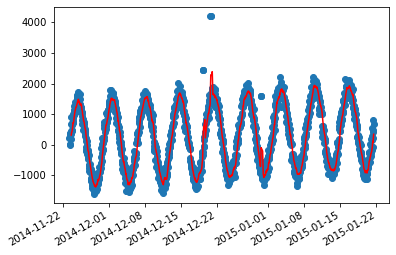

File: A2Benchmarksynthetic_17
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  2455.065872           1       -184.049376
2014-12-19 07:00:00  2455.065872           1        131.277929
2014-12-19 08:00:00  2455.065872           1        434.182466
2014-12-20 17:00:00  4206.886469           1       1615.174388
2014-12-20 18:00:00  4206.886469           1       1918.062304
2014-12-20 19:00:00  4206.886469           1       2251.493975
2014-12-30 12:00:00  1591.137711           1       -516.732011
2014-12-30 13:00:00  1591.137711           1       -316.032263
2014-12-30 14:00:00  1591.137711           1        -99.700740
Precision:  1.0
Recall: 1.0
F1: 1.0
Processing index: 10 of 100


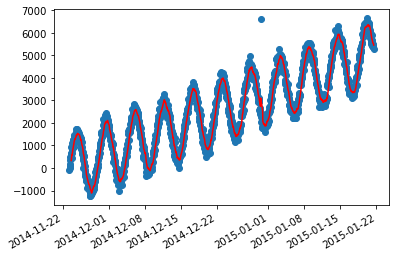

File: A2Benchmarksynthetic_18
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-30 12:00:00  6622.489879           1       3107.830311
Precision:  1.0
Recall: 1.0
F1: 1.0


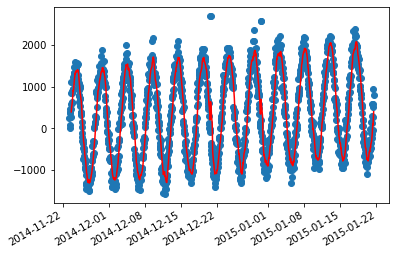

File: A2Benchmarksynthetic_19
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-20 17:00:00  2701.113338           1        420.848222
2014-12-20 18:00:00  2701.113338           1        644.524429
2014-12-30 12:00:00  2570.985949           1        521.117441
2014-12-30 13:00:00  2570.985949           1        699.943844
Precision:  1.0
Recall: 1.0
F1: 1.0


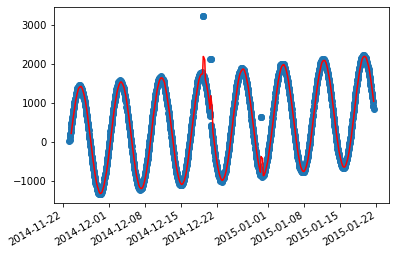

File: A2Benchmarksynthetic_2
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  3225.596069           1       1896.791291
2014-12-30 12:00:00   631.206140           1       -646.022921
Precision:  1.0
Recall: 0.2222222222222222
F1: 0.3636363636363636


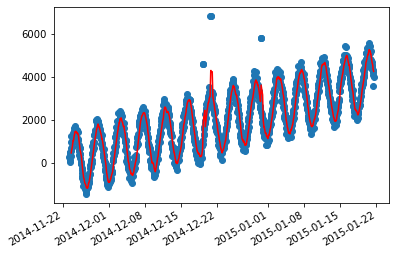

File: A2Benchmarksynthetic_20
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  4595.357487           1       1070.244020
2014-12-19 07:00:00  4595.357487           1       1488.622234
2014-12-19 08:00:00  4595.357487           1       1892.770750
2014-12-20 17:00:00  6838.500015           1       3492.967892
2014-12-20 18:00:00  6838.500015           1       3876.268505
2014-12-20 19:00:00  6838.500015           1       4296.314039
2014-12-30 12:00:00  5794.273164           1       3097.824547
2014-12-30 13:00:00  5794.273164           1       3347.755658
2014-12-30 14:00:00  5794.273164           1       3617.713114
Precision:  1.0
Recall: 1.0
F1: 1.0


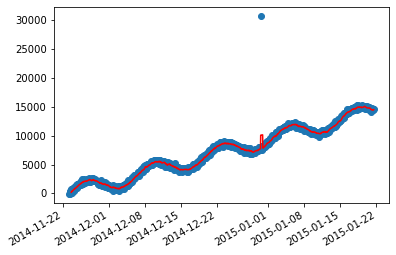

File: A2Benchmarksynthetic_21
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-30 12:00:00  30692.054083           1      10070.523099
Precision:  1.0
Recall: 1.0
F1: 1.0


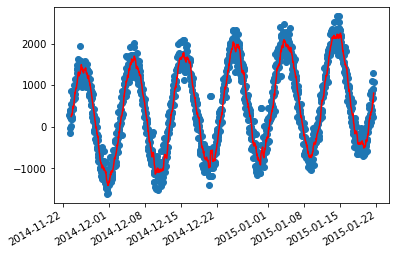

File: A2Benchmarksynthetic_22
threshold:1200
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00  737.743951           1       -786.566496
2014-12-20 18:00:00  737.743951           1       -616.952565
2014-12-30 12:00:00  446.493838           1       -794.476389
Precision:  1.0
Recall: 0.75
F1: 0.8571428571428571


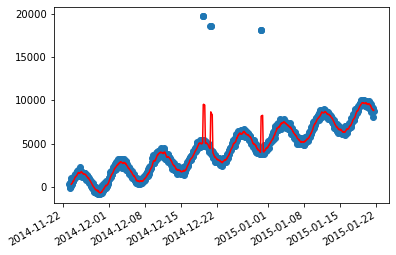

File: A2Benchmarksynthetic_23
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-19 06:00:00  19740.188389           1       6574.382233
2014-12-19 07:00:00  19740.188389           1       8043.081660
2014-12-19 08:00:00  19740.188389           1       9500.259522
2014-12-20 17:00:00  18553.830928           1       5829.155420
2014-12-20 18:00:00  18553.830928           1       7227.647173
2014-12-20 19:00:00  18553.830928           1       8676.655503
2014-12-30 12:00:00  18153.623148           1       5387.317375
2014-12-30 13:00:00  18153.623148           1       6777.064504
2014-12-30 14:00:00  18153.623148           1       8183.648117
Precision:  1.0
Recall: 1.0
F1: 1.0


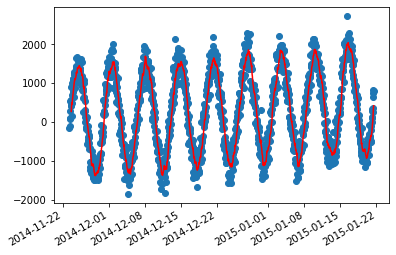

File: A2Benchmarksynthetic_24
threshold:1200
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0


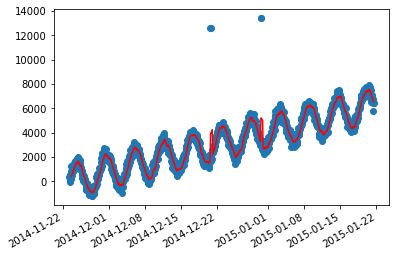

File: A2Benchmarksynthetic_25
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-20 17:00:00  12575.790049           1       2755.483563
2014-12-20 18:00:00  12575.790049           1       3858.936063
2014-12-30 12:00:00  13405.000517           1       4234.158347
2014-12-30 13:00:00  13405.000517           1       5204.937175
Precision:  1.0
Recall: 1.0
F1: 1.0


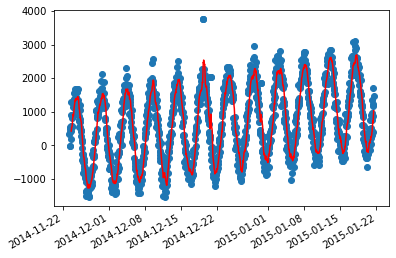

File: A2Benchmarksynthetic_26
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  3755.844471           1       2086.160470
2014-12-19 07:00:00  3755.844471           1       2283.814020
2014-12-19 08:00:00  3755.844471           1       2466.580636
2014-12-20 17:00:00  2041.956620           1        612.659932
2014-12-20 18:00:00  2041.956620           1        741.827481
Precision:  1.0
Recall: 0.5555555555555556
F1: 0.7142857142857143
Processing index: 20 of 100


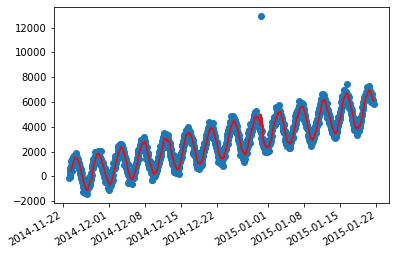

File: A2Benchmarksynthetic_27
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-30 12:00:00  12933.963939           1       5009.115267
Precision:  1.0
Recall: 1.0
F1: 1.0


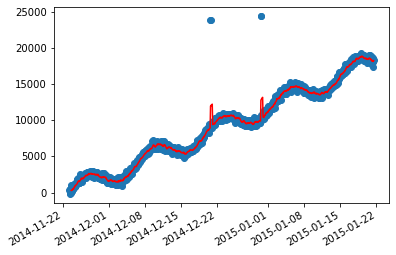

File: A2Benchmarksynthetic_28
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-20 17:00:00  23827.991635           1      10416.910690
2014-12-20 18:00:00  23827.991635           1      11921.807328
2014-12-30 12:00:00  24372.452465           1      11327.593003
2014-12-30 13:00:00  24372.452465           1      12757.431059
Precision:  1.0
Recall: 1.0
F1: 1.0


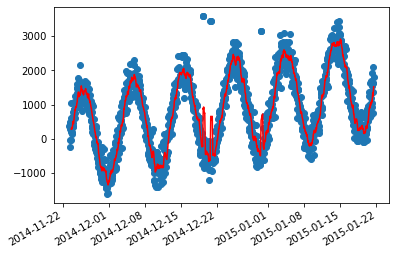

File: A2Benchmarksynthetic_29
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  3599.566321           1        155.027744
2014-12-19 07:00:00  3599.566321           1        532.012381
2014-12-19 08:00:00  3599.566321           1        898.348208
2014-12-20 17:00:00  3449.742128           1       -223.162918
2014-12-20 18:00:00  3449.742128           1        185.250564
2014-12-20 19:00:00  3449.742128           1        652.779771
2014-12-30 12:00:00  3161.305435           1       -163.365038
2014-12-30 13:00:00  3161.305435           1        176.404870
2014-12-30 14:00:00  3161.305435           1        535.563166
Precision:  1.0
Recall: 1.0
F1: 1.0


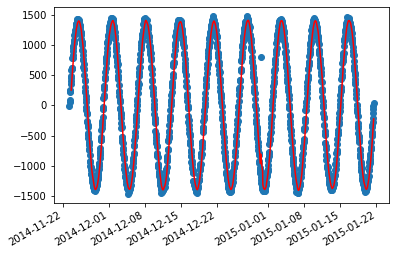

File: A2Benchmarksynthetic_3
threshold:1200
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00  791.823067           1       -806.116966
Precision:  1.0
Recall: 1.0
F1: 1.0


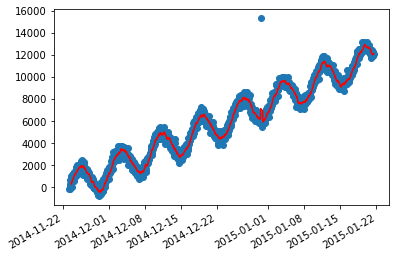

File: A2Benchmarksynthetic_30
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-30 12:00:00  15325.861692           1       7120.397159
Precision:  1.0
Recall: 1.0
F1: 1.0


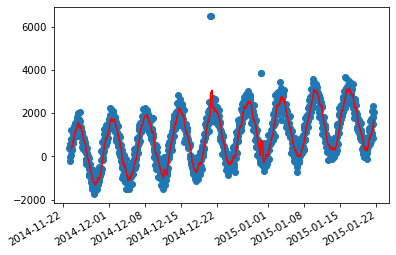

File: A2Benchmarksynthetic_31
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-20 17:00:00  6519.797396           1       2396.396624
2014-12-20 18:00:00  6519.797396           1       2869.582379
2014-12-30 12:00:00  3853.824702           1        381.932392
2014-12-30 13:00:00  3853.824702           1        720.207089
Precision:  1.0
Recall: 1.0
F1: 1.0


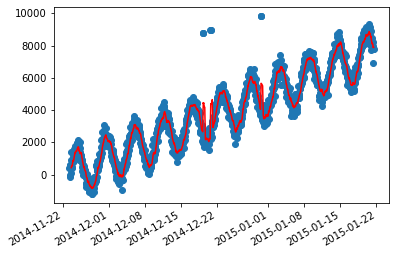

File: A2Benchmarksynthetic_32
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-19 06:00:00  8812.542813           1       3275.316553
2014-12-19 07:00:00  8812.542813           1       3874.685455
2014-12-19 08:00:00  8812.542813           1       4464.791662
2014-12-20 17:00:00  8987.656808           1       2940.711118
2014-12-20 18:00:00  8987.656808           1       3625.139269
2014-12-20 19:00:00  8987.656808           1       4372.114916
2014-12-30 12:00:00  9830.944052           1       4578.711942
2014-12-30 13:00:00  9830.944052           1       5107.280951
2014-12-30 14:00:00  9830.944052           1       5662.801853
Precision:  1.0
Recall: 1.0
F1: 1.0


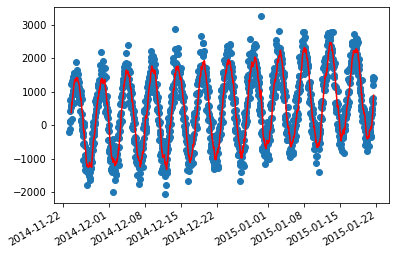

File: A2Benchmarksynthetic_33
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-13 21:00:00  2880.566152           0       1549.870470
2014-12-30 12:00:00  3252.390692           1       1037.440764
Precision:  0.5
Recall: 1.0
F1: 0.6666666666666666


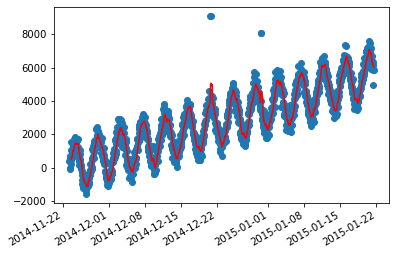

File: A2Benchmarksynthetic_34
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-20 17:00:00  9088.466267           1       4452.113588
2014-12-20 18:00:00  9088.466267           1       4979.074105
2014-12-29 05:00:00  5770.042757           0       4551.705778
2014-12-30 12:00:00  8056.499950           1       4246.855374
2014-12-30 13:00:00  8056.499950           1       4606.616998
2015-01-14 18:00:00  5577.944284           0       4343.007656
Precision:  0.6666666666666666
Recall: 1.0
F1: 0.8


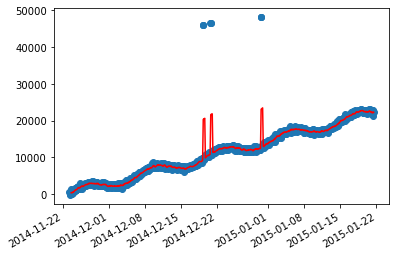

File: A2Benchmarksynthetic_35
threshold:1200
Outliers:
                       value_data  is_anomaly  value_prediction
timestamp                                                      
2014-12-19 06:00:00  45998.101187           1      12905.830879
2014-12-19 07:00:00  45998.101187           1      16606.249444
2014-12-19 08:00:00  45998.101187           1      20286.084379
2014-12-20 17:00:00  46597.041510           1      14368.427727
2014-12-20 18:00:00  46597.041510           1      17965.167620
2014-12-20 19:00:00  46597.041510           1      21629.032146
2014-12-30 12:00:00  48173.999054           1      15946.523066
2014-12-30 13:00:00  48173.999054           1      19501.722569
2014-12-30 14:00:00  48173.999054           1      23077.621825
Precision:  1.0
Recall: 1.0
F1: 1.0
Processing index: 30 of 100


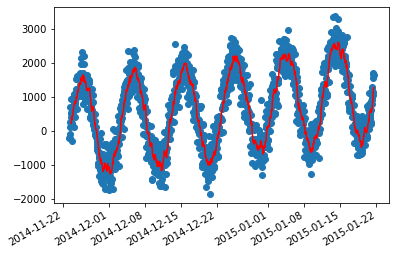

File: A2Benchmarksynthetic_36
threshold:1200
Outliers:
                      value_data  is_anomaly  value_prediction
timestamp                                                     
2014-12-13 21:00:00  2549.909892           0       1165.777190
2014-12-30 12:00:00   908.522117           1       -293.354607
Precision:  0.5
Recall: 1.0
F1: 0.6666666666666666
MA Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:16.420197


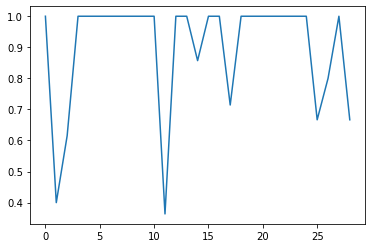

In [85]:
start_time = datetime.now() 
f1_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 30:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
    # Tail-rolling average transform
    rolling = df.rolling(window=10)
    rolling_mean = rolling.mean()
        
    # plot original and transformed dataset
    plt.plot_date(df['timestamp'],df['value'])
    plt.plot_date(df['timestamp'],rolling_mean.value,color="red",fmt="-")
    plt.gcf().autofmt_xdate()
    plt.savefig("./MAoutput/" + fname +"MAWindow10")
    plt.show()
    
    MAprediction = pd.concat([df['timestamp'],rolling_mean.value],axis=1)
    MAprediction.set_index('timestamp')
    checkingmatrix = df_indexed.join(MAprediction.set_index('timestamp'), on='timestamp',how='inner',lsuffix='_data',rsuffix='_prediction')
    
    manual_threshold = 1200
    outliers = checkingmatrix[checkingmatrix.value_data >= checkingmatrix.value_prediction + manual_threshold]
    outliers = outliers.drop_duplicates()
    print(f"File: {fname}")
    print(f"threshold:{manual_threshold}")
    print("Outliers:")
    print(outliers)

    not_outliers = checkingmatrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'] #checkingmatrix[checkingmatrix.value_data <= checkingmatrix.value_prediction + manual_threshold]
    #not_outliers = not_outliers.append(rolling_mean[rolling_mean.value > -1*(manual_threshold)])
    not_outliers = not_outliers.drop_duplicates()
    
    truepositives = outliers[outliers.is_anomaly == 1]
    falsepostives = outliers[outliers.is_anomaly == 0]
    truenegatives = not_outliers[not_outliers.is_anomaly == 0]
    falsenegatives = not_outliers[not_outliers.is_anomaly == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    
    
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    print("Recall:", recall)
    recall_plot.append(recall)
    
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        continue
    

    
end_time=datetime.now()
print(f"MA Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)

In [86]:
print(sum(f1_plot)/len(f1_plot))

0.8994407890959615


### Do this in a loop after Standardizing the Data

In [87]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

Processing index: 0 of 100
Mean: 6.368346, StandardDeviation: 987.420584


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


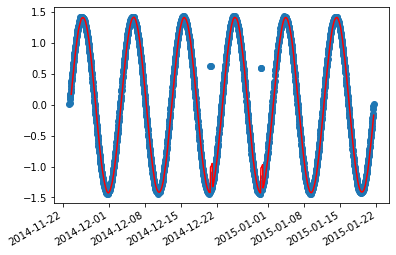

File: A2Benchmarksynthetic_1
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    0.617816           1         -1.214285
2014-12-20 18:00:00    0.617816           1         -1.010340
2014-12-30 12:00:00    0.588934           1         -1.224898
2014-12-30 13:00:00    0.588934           1         -1.024770
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 100.510082, StandardDeviation: 994.197252


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


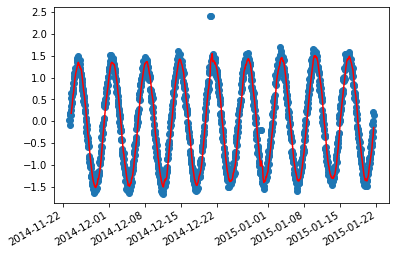

File: A2Benchmarksynthetic_10
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00     2.40375           1          1.195647
Precision:  1.0
Recall: 0.25
F1: 0.4
--------------------
Mean: 17255.105564, StandardDeviation: 10042.787001


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


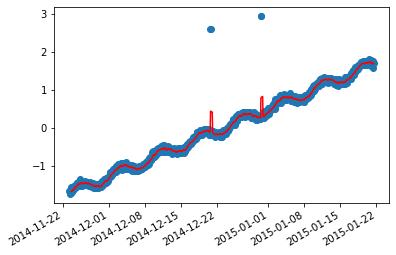

File: A2Benchmarksynthetic_100
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.615356           1          0.165866
2014-12-20 18:00:00    2.615356           1          0.437187
2014-12-30 12:00:00    2.950290           1          0.529350
2014-12-30 13:00:00    2.950290           1          0.794463
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1613.761107, StandardDeviation: 1381.918933


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


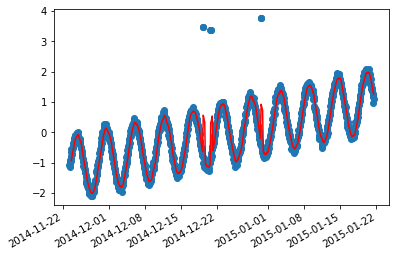

File: A2Benchmarksynthetic_11
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    3.480926           1         -0.229578
2014-12-19 07:00:00    3.480926           1          0.167445
2014-12-19 08:00:00    3.480926           1          0.565091
2014-12-20 17:00:00    3.372082           1         -0.591860
2014-12-20 18:00:00    3.372082           1         -0.142979
2014-12-20 19:00:00    3.372082           1          0.320531
2014-12-30 12:00:00    3.767044           1          0.166346
2014-12-30 13:00:00    3.767044           1          0.541277
2014-12-30 14:00:00    3.767044           1          0.925911
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 70.366661, StandardDeviation: 994.123425


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


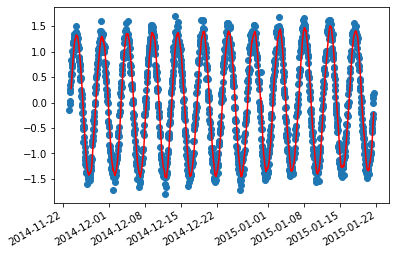

File: A2Benchmarksynthetic_12
threshold:1.2
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0
Mean: 1399.681750, StandardDeviation: 1305.117440


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


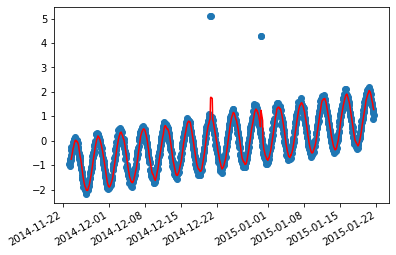

File: A2Benchmarksynthetic_13
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.100373           1          1.323499
2014-12-20 18:00:00    5.100373           1          1.751867
2014-12-30 12:00:00    4.287849           1          0.913993
2014-12-30 13:00:00    4.287849           1          1.256051
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 4873.417218, StandardDeviation: 2960.351286


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


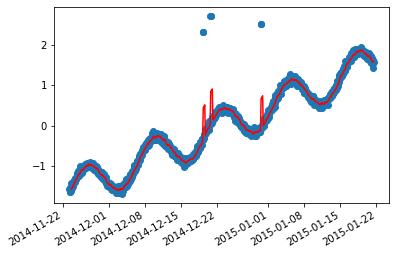

File: A2Benchmarksynthetic_14
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.320077           1         -0.116000
2014-12-19 07:00:00    2.320077           1          0.160077
2014-12-19 08:00:00    2.320077           1          0.432815
2014-12-20 17:00:00    2.722561           1          0.291672
2014-12-20 18:00:00    2.722561           1          0.566027
2014-12-20 19:00:00    2.722561           1          0.848951
2014-12-30 12:00:00    2.513307           1          0.149542
2014-12-30 13:00:00    2.513307           1          0.409590
2014-12-30 14:00:00    2.513307           1          0.672250
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 110.688388, StandardDeviation: 1004.712332


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


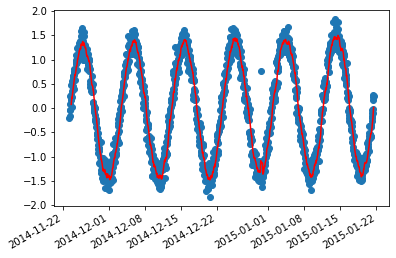

File: A2Benchmarksynthetic_15
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    0.770344           1         -1.084196
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 3191.408691, StandardDeviation: 2074.503331


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


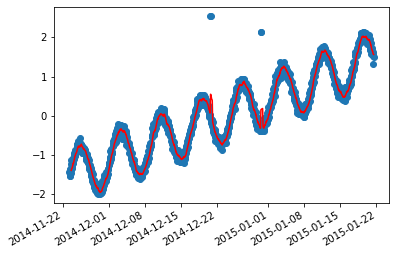

File: A2Benchmarksynthetic_16
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.544810           1          0.304856
2014-12-20 18:00:00    2.544810           1          0.546072
2014-12-30 12:00:00    2.131365           1         -0.084764
2014-12-30 13:00:00    2.131365           1          0.150757
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 299.954448, StandardDeviation: 1024.294474


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


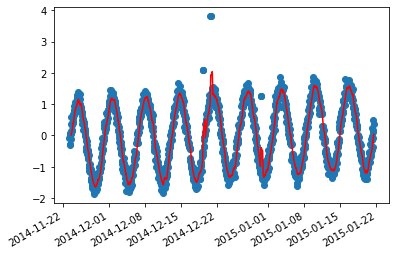

File: A2Benchmarksynthetic_17
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.103996           1         -0.472524
2014-12-19 07:00:00    2.103996           1         -0.164676
2014-12-19 08:00:00    2.103996           1          0.131044
2014-12-20 17:00:00    3.814266           1          1.284025
2014-12-20 18:00:00    3.814266           1          1.579729
2014-12-20 19:00:00    3.814266           1          1.905252
2014-12-30 12:00:00    1.260559           1         -0.797316
2014-12-30 13:00:00    1.260559           1         -0.601377
2014-12-30 14:00:00    1.260559           1         -0.390176
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 10 of 100
Mean: 2596.446120, StandardDeviation: 1785.539102


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


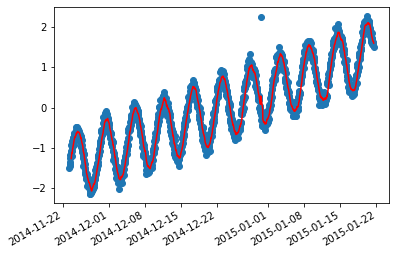

File: A2Benchmarksynthetic_18
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.254806           1          0.286403
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 362.532163, StandardDeviation: 1021.057616


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


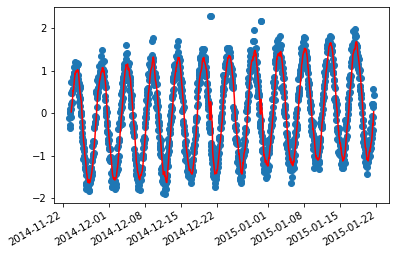

File: A2Benchmarksynthetic_19
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.290352           1          0.057113
2014-12-20 18:00:00    2.290352           1          0.276177
2014-12-30 12:00:00    2.162908           1          0.155315
2014-12-30 13:00:00    2.162908           1          0.330453
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 486.384558, StandardDeviation: 1024.391457


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


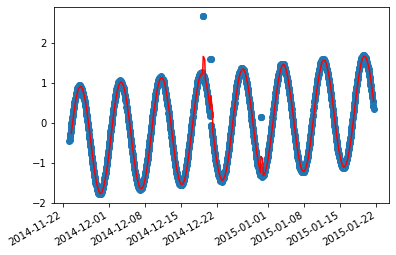

File: A2Benchmarksynthetic_2
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.673989           1          1.376824
2014-12-30 12:00:00    0.141373           1         -1.105444
Precision:  1.0
Recall: 0.2222222222222222
F1: 0.3636363636363636
--------------------
Mean: 1995.674055, StandardDeviation: 1534.256092


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


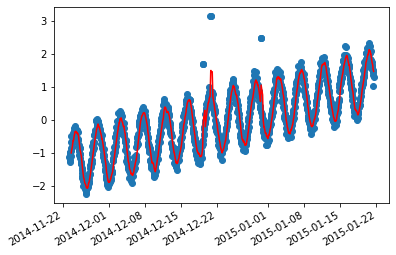

File: A2Benchmarksynthetic_20
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    1.694426           1         -0.603178
2014-12-19 07:00:00    1.694426           1         -0.330487
2014-12-19 08:00:00    1.694426           1         -0.067070
2014-12-20 17:00:00    3.156465           1          0.975909
2014-12-20 18:00:00    3.156465           1          1.225737
2014-12-20 19:00:00    3.156465           1          1.499515
2014-12-30 12:00:00    2.475857           1          0.718361
2014-12-30 13:00:00    2.475857           1          0.881262
2014-12-30 14:00:00    2.475857           1          1.057215
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 7282.327986, StandardDeviation: 4298.843109


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


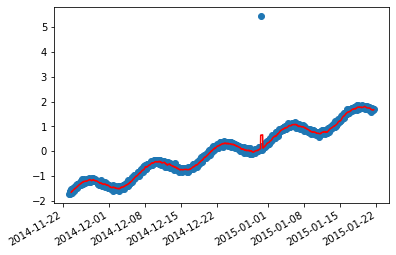

File: A2Benchmarksynthetic_21
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.445587           1          0.648592
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 480.352675, StandardDeviation: 1013.895439


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


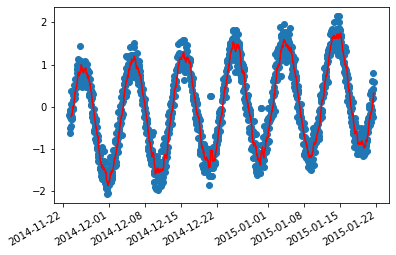

File: A2Benchmarksynthetic_22
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    0.253864           1         -1.249556
2014-12-20 18:00:00    0.253864           1         -1.082267
2014-12-30 12:00:00   -0.033395           1         -1.257358
Precision:  1.0
Recall: 0.75
F1: 0.8571428571428571
--------------------
Mean: 4471.669226, StandardDeviation: 2925.391670


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


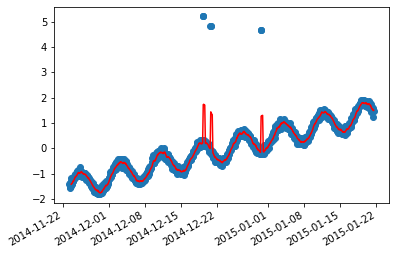

File: A2Benchmarksynthetic_23
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    5.219308           1          0.718780
2014-12-19 07:00:00    5.219308           1          1.220832
2014-12-19 08:00:00    5.219308           1          1.718946
2014-12-20 17:00:00    4.813770           1          0.464036
2014-12-20 18:00:00    4.813770           1          0.942089
2014-12-20 19:00:00    4.813770           1          1.437410
2014-12-30 12:00:00    4.676965           1          0.313000
2014-12-30 13:00:00    4.676965           1          0.788064
2014-12-30 14:00:00    4.676965           1          1.268883
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 281.561558, StandardDeviation: 1014.996111


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


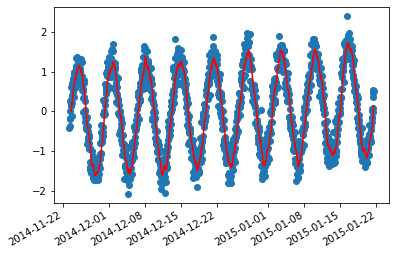

File: A2Benchmarksynthetic_24
threshold:1.2
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0
Mean: 3211.798426, StandardDeviation: 2136.444375


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


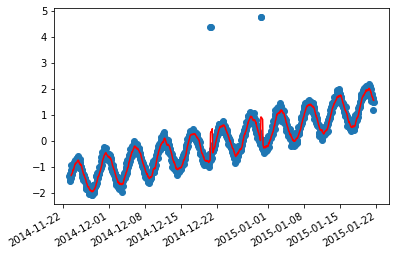

File: A2Benchmarksynthetic_25
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    4.382979           1         -0.213586
2014-12-20 18:00:00    4.382979           1          0.302904
2014-12-30 12:00:00    4.771106           1          0.478533
2014-12-30 13:00:00    4.771106           1          0.932923
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 677.021695, StandardDeviation: 1078.857833


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


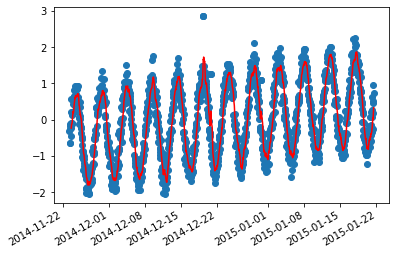

File: A2Benchmarksynthetic_26
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.853780           1          1.306139
2014-12-19 07:00:00    2.853780           1          1.489346
2014-12-20 17:00:00    1.265167           1         -0.059657
2014-12-20 18:00:00    1.265167           1          0.060069
Precision:  1.0
Recall: 0.4444444444444444
F1: 0.6153846153846153
--------------------
Processing index: 20 of 100
Mean: 2841.957725, StandardDeviation: 1929.904148


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


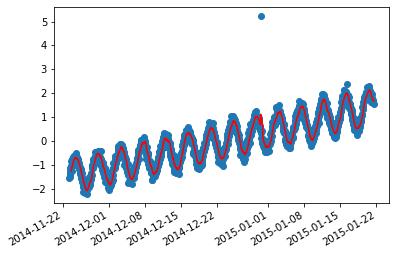

File: A2Benchmarksynthetic_27
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.229278           1          1.122935
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 9202.203480, StandardDeviation: 5383.176339


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


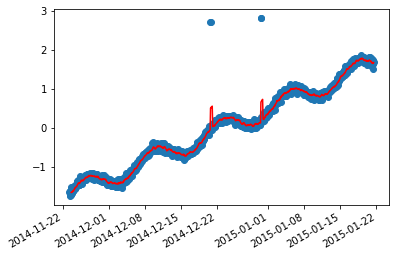

File: A2Benchmarksynthetic_28
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.716944           1          0.225649
2014-12-20 18:00:00    2.716944           1          0.505204
2014-12-30 12:00:00    2.818085           1          0.394821
2014-12-30 13:00:00    2.818085           1          0.660433
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 853.154308, StandardDeviation: 1095.773774


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


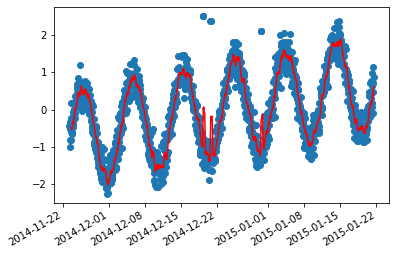

File: A2Benchmarksynthetic_29
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.506368           1         -0.637108
2014-12-19 07:00:00    2.506368           1         -0.293073
2014-12-19 08:00:00    2.506368           1          0.041244
2014-12-20 17:00:00    2.369639           1         -0.982244
2014-12-20 18:00:00    2.369639           1         -0.609527
2014-12-20 19:00:00    2.369639           1         -0.182861
2014-12-30 12:00:00    2.106412           1         -0.927673
2014-12-30 13:00:00    2.106412           1         -0.617600
2014-12-30 14:00:00    2.106412           1         -0.289833
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 5.536843, StandardDeviation: 989.172534


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


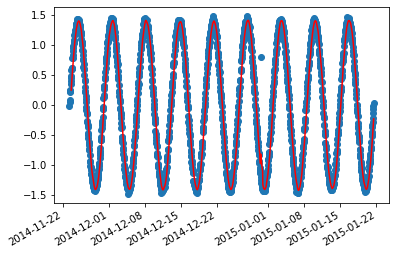

File: A2Benchmarksynthetic_3
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    0.794893           1         -0.820538
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 5950.417354, StandardDeviation: 3552.981132


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


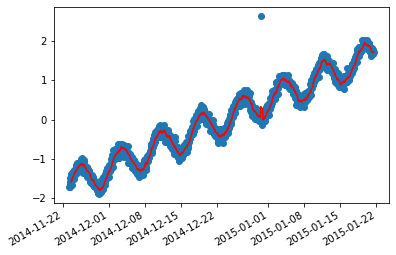

File: A2Benchmarksynthetic_30
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.638754           1          0.329295
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 959.394771, StandardDeviation: 1155.849408


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


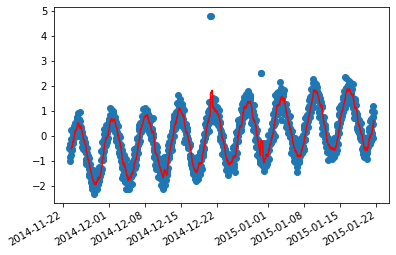

File: A2Benchmarksynthetic_31
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    4.810664           1          1.243243
2014-12-20 18:00:00    4.810664           1          1.652627
2014-12-30 12:00:00    2.504158           1         -0.499600
2014-12-30 13:00:00    2.504158           1         -0.206937
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 3878.769478, StandardDeviation: 2453.291769


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


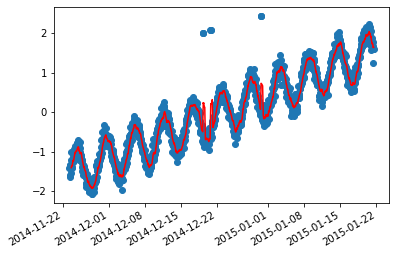

File: A2Benchmarksynthetic_32
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.011083           1         -0.245977
2014-12-19 07:00:00    2.011083           1         -0.001665
2014-12-19 08:00:00    2.011083           1          0.238872
2014-12-20 17:00:00    2.082462           1         -0.382367
2014-12-20 18:00:00    2.082462           1         -0.103384
2014-12-20 19:00:00    2.082462           1          0.201095
2014-12-30 12:00:00    2.426199           1          0.285307
2014-12-30 13:00:00    2.426199           1          0.500760
2014-12-30 14:00:00    2.426199           1          0.727199
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 533.967462, StandardDeviation: 1069.884522


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


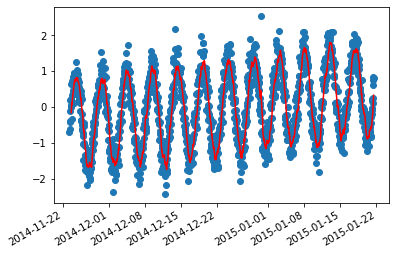

File: A2Benchmarksynthetic_33
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-13 21:00:00    2.193320           0          0.949545
2014-12-30 12:00:00    2.540857           1          0.470587
Precision:  0.5
Recall: 1.0
F1: 0.6666666666666666
--------------------
Mean: 2873.685166, StandardDeviation: 1957.027297


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


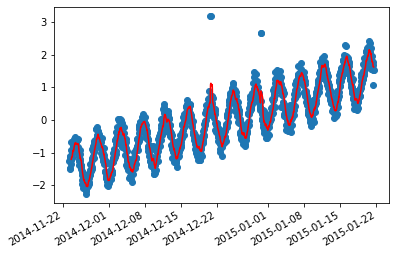

File: A2Benchmarksynthetic_34
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    3.175623           1          0.806544
2014-12-20 18:00:00    3.175623           1          1.075810
2014-12-30 12:00:00    2.648310           1          0.701661
2014-12-30 13:00:00    2.648310           1          0.885492
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 11410.899789, StandardDeviation: 7069.718250


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


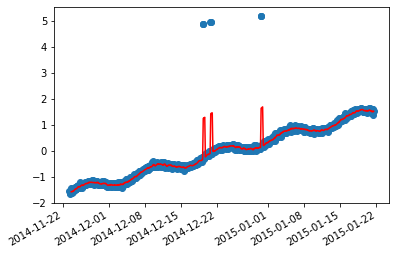

File: A2Benchmarksynthetic_35
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.892303           1          0.211456
2014-12-19 07:00:00    4.892303           1          0.734874
2014-12-19 08:00:00    4.892303           1          1.255380
2014-12-20 17:00:00    4.977022           1          0.418337
2014-12-20 18:00:00    4.977022           1          0.927090
2014-12-20 19:00:00    4.977022           1          1.445338
2014-12-30 12:00:00    5.200080           1          0.641556
2014-12-30 13:00:00    5.200080           1          1.144434
2014-12-30 14:00:00    5.200080           1          1.650239
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 30 of 100
Mean: 634.296881, StandardDeviation: 1095.076584


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


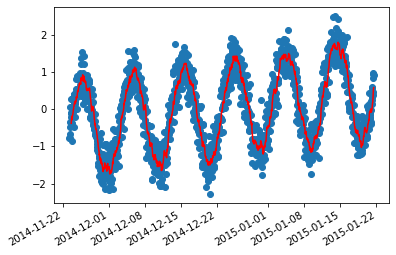

File: A2Benchmarksynthetic_36
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-13 21:00:00    1.749296           0          0.485336
Precision:  0.0
Recall: 0.0
precision + recall = 0
Mean: 6556.232773, StandardDeviation: 4013.701672


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


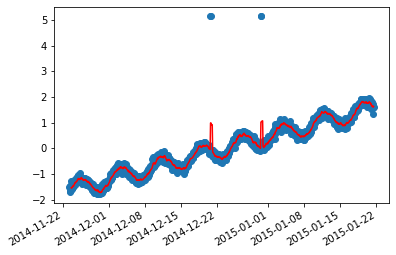

File: A2Benchmarksynthetic_37
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.143563           1          0.470963
2014-12-20 18:00:00    5.143563           1          0.986545
2014-12-30 12:00:00    5.148342           1          0.509517
2014-12-30 13:00:00    5.148342           1          1.014503
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1442.278105, StandardDeviation: 1306.683693


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


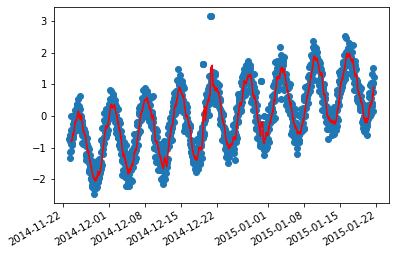

File: A2Benchmarksynthetic_38
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    1.647209           1         -0.497927
2014-12-19 07:00:00    1.647209           1         -0.239172
2014-12-19 08:00:00    1.647209           1          0.002449
2014-12-20 17:00:00    3.160169           1          0.960396
2014-12-20 18:00:00    3.160169           1          1.216422
2014-12-20 19:00:00    3.160169           1          1.528341
2014-12-30 12:00:00    1.111583           1         -0.502055
2014-12-30 13:00:00    1.111583           1         -0.364395
2014-12-30 14:00:00    1.111583           1         -0.204285
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 5179.096630, StandardDeviation: 3173.156284


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


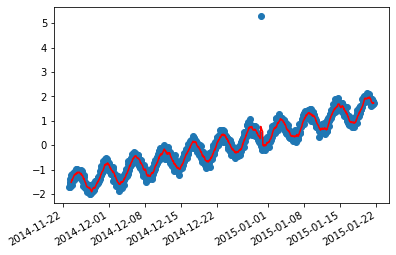

File: A2Benchmarksynthetic_39
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.291048           1          0.773105
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 632.735854, StandardDeviation: 1043.469684


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


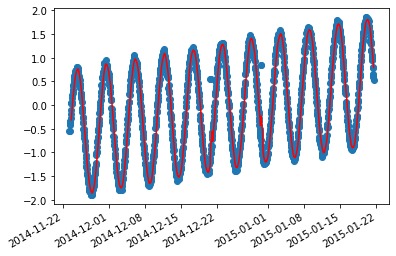

File: A2Benchmarksynthetic_4
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    0.544478           1         -1.082480
2014-12-20 18:00:00    0.544478           1         -0.890911
Precision:  1.0
Recall: 0.5
F1: 0.6666666666666666
--------------------
Mean: 1588.069123, StandardDeviation: 1364.684820


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


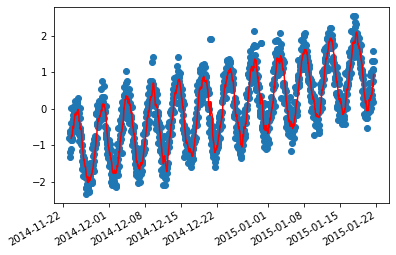

File: A2Benchmarksynthetic_40
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    1.917906           1         -0.001667
2014-12-20 18:00:00    1.917906           1          0.190081
2014-12-30 12:00:00    1.807941           1          0.254882
2014-12-30 13:00:00    1.807941           1          0.376309
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 3224.960580, StandardDeviation: 2265.218133


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


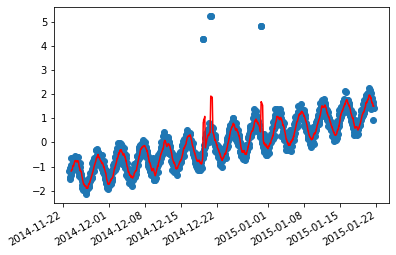

File: A2Benchmarksynthetic_41
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.310493           1         -0.185625
2014-12-19 07:00:00    4.310493           1          0.327759
2014-12-19 08:00:00    4.310493           1          0.830460
2014-12-20 17:00:00    5.254139           1          0.917080
2014-12-20 18:00:00    5.254139           1          1.404205
2014-12-20 19:00:00    5.254139           1          1.926306
2014-12-30 12:00:00    4.853774           1          0.854489
2014-12-30 13:00:00    4.853774           1          1.267712
2014-12-30 14:00:00    4.853774           1          1.695822
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 14015.791325, StandardDeviation: 8113.068457


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


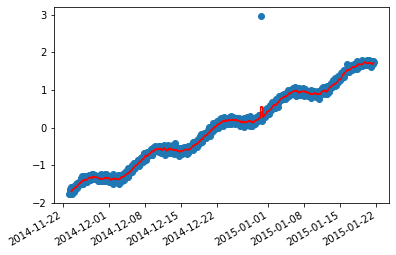

File: A2Benchmarksynthetic_42
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.965268           1           0.55024
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1844.380800, StandardDeviation: 1439.541406


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


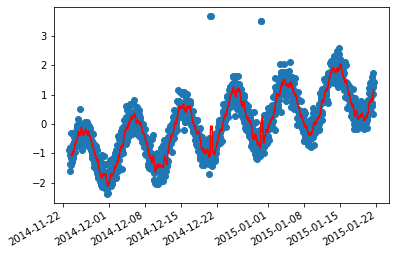

File: A2Benchmarksynthetic_43
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    3.683752           1         -0.605781
2014-12-20 18:00:00    3.683752           1         -0.128742
2014-12-30 12:00:00    3.531873           1         -0.405475
2014-12-30 13:00:00    3.531873           1          0.001837
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 7485.049903, StandardDeviation: 4477.502832


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


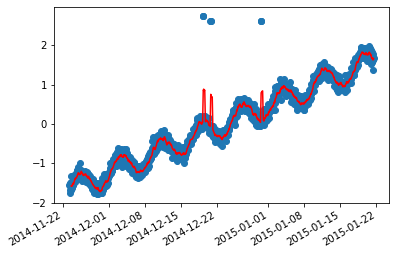

File: A2Benchmarksynthetic_44
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.742542           1          0.319970
2014-12-19 07:00:00    2.742542           1          0.591706
2014-12-19 08:00:00    2.742542           1          0.858583
2014-12-20 17:00:00    2.610071           1          0.204182
2014-12-20 18:00:00    2.610071           1          0.468365
2014-12-20 19:00:00    2.610071           1          0.753260
2014-12-30 12:00:00    2.616068           1          0.291166
2014-12-30 13:00:00    2.616068           1          0.538642
2014-12-30 14:00:00    2.616068           1          0.792880
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 40 of 100
Mean: 993.259043, StandardDeviation: 1187.711162


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


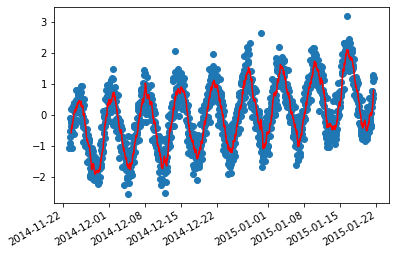

File: A2Benchmarksynthetic_45
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-13 21:00:00    2.058887           0          0.597579
2014-12-30 12:00:00    2.637652           1         -0.142980
Precision:  0.5
Recall: 1.0
F1: 0.6666666666666666
--------------------
Mean: 4883.689181, StandardDeviation: 3002.178684


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


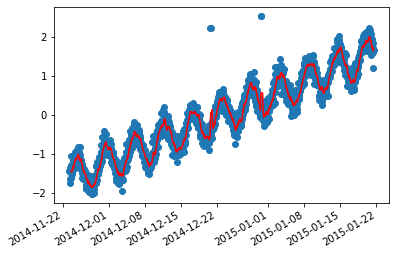

File: A2Benchmarksynthetic_46
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.247531           1         -0.277092
2014-12-20 18:00:00    2.247531           1          0.007704
2014-12-30 12:00:00    2.547446           1          0.346732
2014-12-30 13:00:00    2.547446           1          0.568341
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2231.122471, StandardDeviation: 1732.376858


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


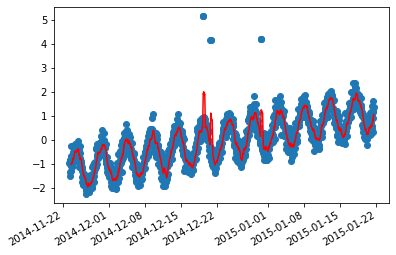

File: A2Benchmarksynthetic_47
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    5.157476           1          1.011011
2014-12-19 07:00:00    5.157476           1          1.481494
2014-12-19 08:00:00    5.157476           1          1.937601
2014-12-20 17:00:00    4.184423           1          0.220048
2014-12-20 18:00:00    4.184423           1          0.643687
2014-12-20 19:00:00    4.184423           1          1.126647
2014-12-30 12:00:00    4.186696           1          0.512862
2014-12-30 13:00:00    4.186696           1          0.876836
2014-12-30 14:00:00    4.186696           1          1.262817
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 4525.112368, StandardDeviation: 2816.829308


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


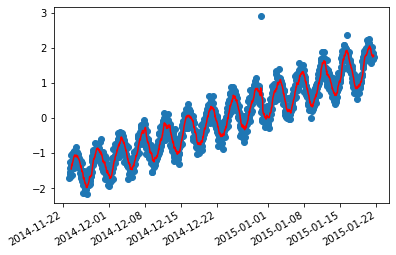

File: A2Benchmarksynthetic_48
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.920773           1          0.871512
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 15071.243554, StandardDeviation: 8998.690990


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


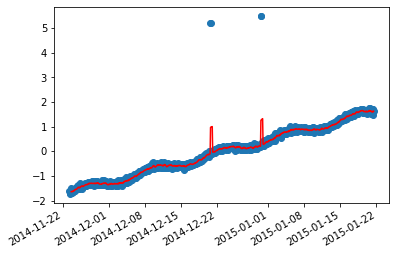

File: A2Benchmarksynthetic_49
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.214945           1          0.438426
2014-12-20 18:00:00    5.214945           1          0.971110
2014-12-30 12:00:00    5.490352           1          0.739563
2014-12-30 13:00:00    5.490352           1          1.263220
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 37.124113, StandardDeviation: 1004.944051


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


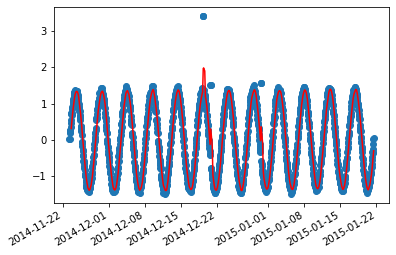

File: A2Benchmarksynthetic_5
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    3.422280           1          1.543294
2014-12-19 07:00:00    3.422280           1          1.759874
2014-12-19 08:00:00    3.422280           1          1.971486
2014-12-20 17:00:00    1.526707           1         -0.003353
2014-12-20 18:00:00    1.526707           1          0.137190
2014-12-20 19:00:00    1.526707           1          0.295414
2014-12-30 12:00:00    1.563339           1          0.089792
2014-12-30 13:00:00    1.563339           1          0.218924
2014-12-30 14:00:00    1.563339           1          0.358706
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2496.588623, StandardDeviation: 1712.264206


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


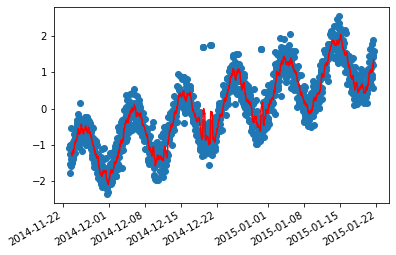

File: A2Benchmarksynthetic_50
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    1.691455           1         -0.530833
2014-12-19 07:00:00    1.691455           1         -0.284431
2014-12-19 08:00:00    1.691455           1         -0.050109
2014-12-20 17:00:00    1.747858           1         -0.675425
2014-12-20 18:00:00    1.747858           1         -0.405680
2014-12-20 19:00:00    1.747858           1         -0.076637
2014-12-30 12:00:00    1.645125           1         -0.414504
2014-12-30 13:00:00    1.645125           1         -0.215003
2014-12-30 14:00:00    1.645125           1          0.003782
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 9558.249333, StandardDeviation: 5634.500670


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


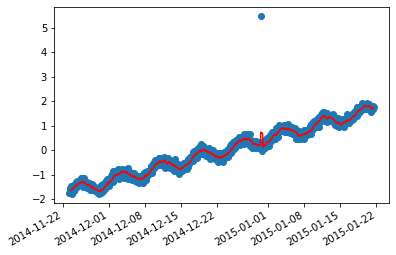

File: A2Benchmarksynthetic_51
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.482078           1          0.747369
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2685.056514, StandardDeviation: 1851.148139


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


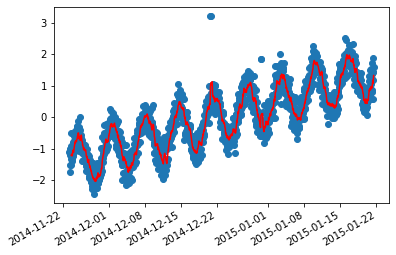

File: A2Benchmarksynthetic_52
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    3.212436           1          0.729692
2014-12-20 18:00:00    3.212436           1          1.013983
2014-12-30 12:00:00    1.839129           1         -0.135497
2014-12-30 13:00:00    1.839129           1          0.047142
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 5334.901872, StandardDeviation: 3432.132309


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


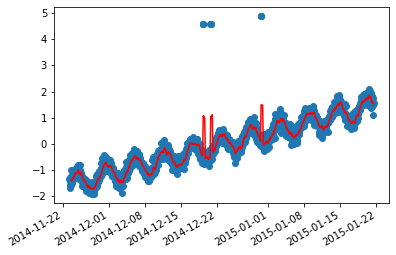

File: A2Benchmarksynthetic_53
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.581084           1          0.063999
2014-12-19 07:00:00    4.581084           1          0.562643
2014-12-19 08:00:00    4.581084           1          1.055675
2014-12-20 17:00:00    4.567789           1         -0.012321
2014-12-20 18:00:00    4.567789           1          0.500348
2014-12-20 19:00:00    4.567789           1          1.043610
2014-12-30 12:00:00    4.886633           1          0.559750
2014-12-30 13:00:00    4.886633           1          1.018439
2014-12-30 14:00:00    4.886633           1          1.488963
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 50 of 100
Mean: 1428.809330, StandardDeviation: 1357.598995


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


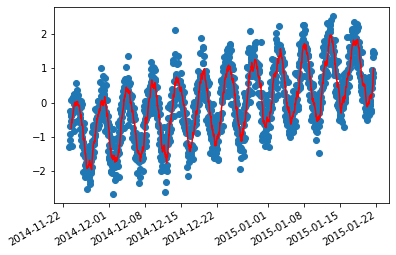

File: A2Benchmarksynthetic_54
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-13 21:00:00    2.119277           0          0.607509
2014-12-28 09:00:00    2.102272           0          0.842049
2014-12-30 12:00:00    1.766812           1          0.564747
2015-01-16 05:00:00    1.913925           0          0.630741
Precision:  0.25
Recall: 1.0
F1: 0.4
--------------------
Mean: 3493.558825, StandardDeviation: 2366.714471


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


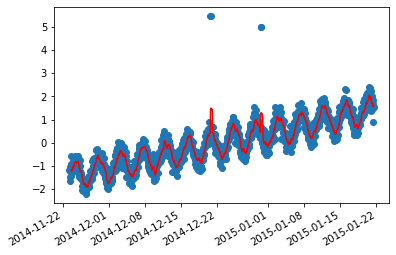

File: A2Benchmarksynthetic_55
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.490880           1          0.928074
2014-12-20 18:00:00    5.490880           1          1.440018
2014-12-30 12:00:00    5.011384           1          0.864969
2014-12-30 13:00:00    5.011384           1          1.289881
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 16835.838156, StandardDeviation: 9846.453856


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


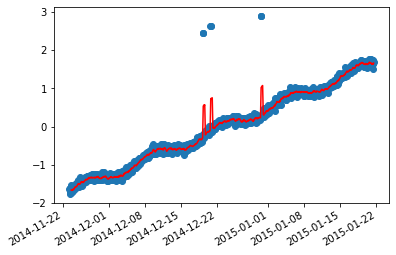

File: A2Benchmarksynthetic_56
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.449570           1         -0.017200
2014-12-19 07:00:00    2.449570           1          0.259984
2014-12-19 08:00:00    2.449570           1          0.534005
2014-12-20 17:00:00    2.638781           1          0.172235
2014-12-20 18:00:00    2.638781           1          0.448171
2014-12-20 19:00:00    2.638781           1          0.735179
2014-12-30 12:00:00    2.897896           1          0.496675
2014-12-30 13:00:00    2.897896           1          0.759001
2014-12-30 14:00:00    2.897896           1          1.024758
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1594.302942, StandardDeviation: 1417.078635


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


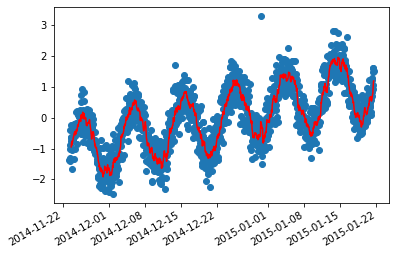

File: A2Benchmarksynthetic_57
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-13 21:00:00    1.710595           0          0.224296
2014-12-30 12:00:00    3.287753           1         -0.129139
Precision:  0.5
Recall: 1.0
F1: 0.6666666666666666
--------------------
Mean: 8984.042125, StandardDeviation: 5305.100902


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


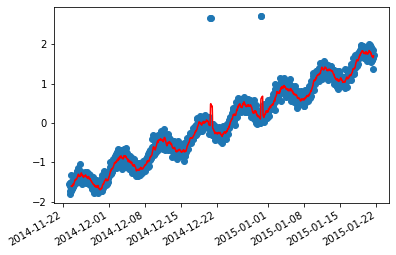

File: A2Benchmarksynthetic_58
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.663647           1          0.203495
2014-12-20 18:00:00    2.663647           1          0.474310
2014-12-30 12:00:00    2.709658           1          0.352861
2014-12-30 13:00:00    2.709658           1          0.603030
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 3513.971473, StandardDeviation: 2396.965434


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


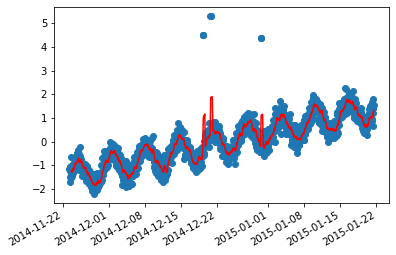

File: A2Benchmarksynthetic_59
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.508653           1         -0.042843
2014-12-19 07:00:00    4.508653           1          0.476116
2014-12-19 08:00:00    4.508653           1          0.981526
2014-12-20 17:00:00    5.300077           1          0.799950
2014-12-20 18:00:00    5.300077           1          1.306601
2014-12-20 19:00:00    5.300077           1          1.861395
2014-12-30 12:00:00    4.363141           1          0.223953
2014-12-30 13:00:00    4.363141           1          0.652656
2014-12-30 14:00:00    4.363141           1          1.099262
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 718.816759, StandardDeviation: 1066.877174


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


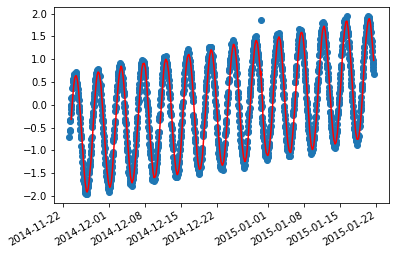

File: A2Benchmarksynthetic_6
threshold:1.2
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0
Mean: 9094.309910, StandardDeviation: 5325.903612


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


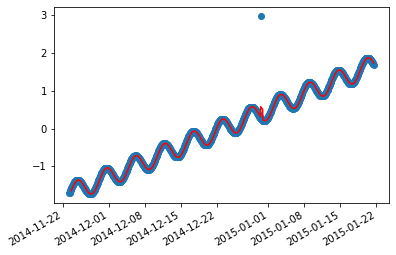

File: A2Benchmarksynthetic_60
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.971187           1          0.575942
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 72.285228, StandardDeviation: 991.387749


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


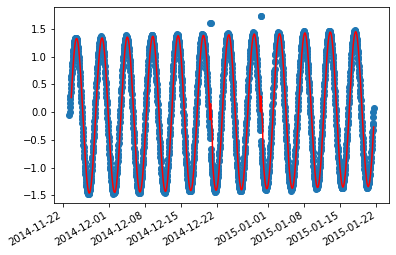

File: A2Benchmarksynthetic_61
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    1.600644           1          0.005251
2014-12-20 18:00:00    1.600644           1          0.152750
2014-12-30 12:00:00    1.727900           1          0.143008
2014-12-30 13:00:00    1.727900           1          0.288200
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 7244.356891, StandardDeviation: 4338.899363


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


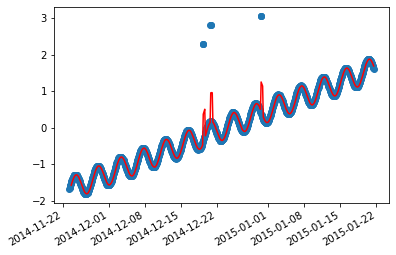

File: A2Benchmarksynthetic_62
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.283666           1         -0.188354
2014-12-19 07:00:00    2.283666           1          0.092366
2014-12-19 08:00:00    2.283666           1          0.371575
2014-12-20 17:00:00    2.811126           1          0.417576
2014-12-20 18:00:00    2.811126           1          0.686945
2014-12-20 19:00:00    2.811126           1          0.956190
2014-12-30 12:00:00    3.057652           1          0.753837
2014-12-30 13:00:00    3.057652           1          1.003296
2014-12-30 14:00:00    3.057652           1          1.254463
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 60 of 100
Mean: 22214.673041, StandardDeviation: 12919.228619


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


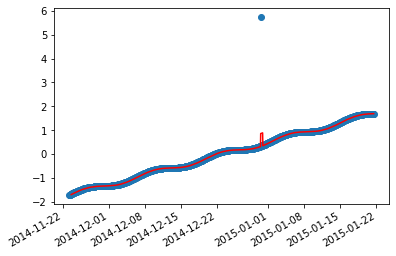

File: A2Benchmarksynthetic_63
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.740462           1          0.860031
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 262.571053, StandardDeviation: 979.725799


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


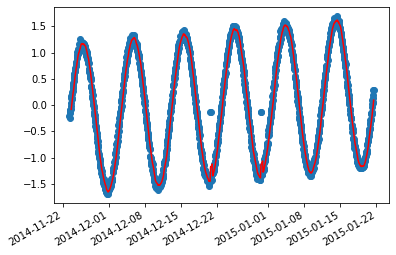

File: A2Benchmarksynthetic_64
threshold:1.2
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0
Mean: 13721.578066, StandardDeviation: 8515.530982


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


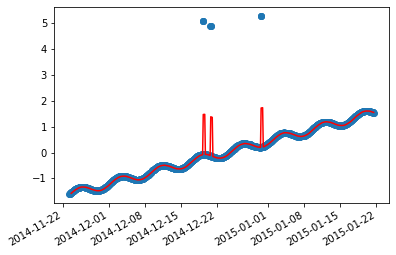

File: A2Benchmarksynthetic_65
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    5.074844           1          0.435138
2014-12-19 07:00:00    5.074844           1          0.951549
2014-12-19 08:00:00    5.074844           1          1.467445
2014-12-20 17:00:00    4.864342           1          0.384335
2014-12-20 18:00:00    4.864342           1          0.880949
2014-12-20 19:00:00    4.864342           1          1.379052
2014-12-30 12:00:00    5.261480           1          0.704945
2014-12-30 13:00:00    5.261480           1          1.210620
2014-12-30 14:00:00    5.261480           1          1.716726
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 197.655971, StandardDeviation: 986.855883


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


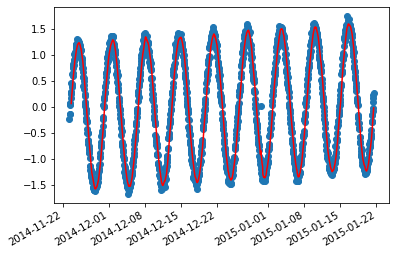

File: A2Benchmarksynthetic_66
threshold:1.2
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0
Mean: 9755.358345, StandardDeviation: 5869.980223


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


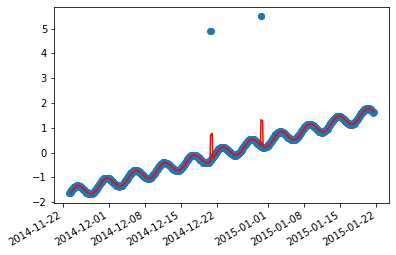

File: A2Benchmarksynthetic_67
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    4.906271           1          0.164852
2014-12-20 18:00:00    4.906271           1          0.694453
2014-12-30 12:00:00    5.508347           1          0.807995
2014-12-30 13:00:00    5.508347           1          1.325810
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 554.177127, StandardDeviation: 1030.296873


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


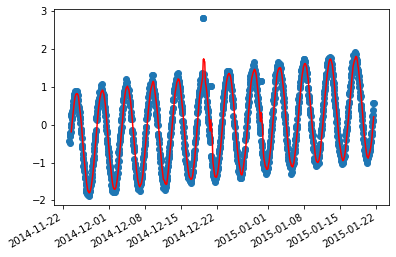

File: A2Benchmarksynthetic_68
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.816559           1          1.392461
2014-12-19 07:00:00    2.816559           1          1.559134
Precision:  1.0
Recall: 0.2222222222222222
F1: 0.3636363636363636
--------------------
Mean: 7829.968809, StandardDeviation: 4650.424410


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


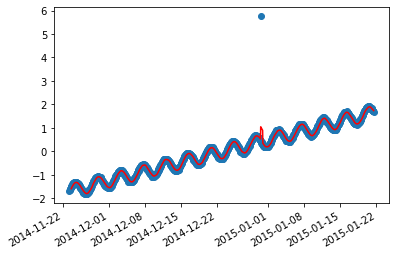

File: A2Benchmarksynthetic_69
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.763673           1          1.047242
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2534.131404, StandardDeviation: 1760.471141


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


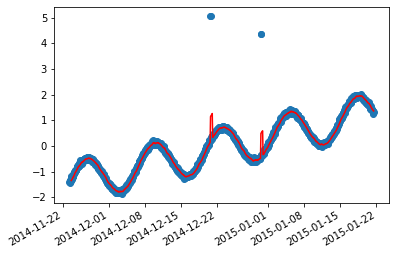

File: A2Benchmarksynthetic_7
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.056955           1          0.645935
2014-12-20 18:00:00    5.056955           1          1.142541
2014-12-30 12:00:00    4.377208           1          0.004426
2014-12-30 13:00:00    4.377208           1          0.489270
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 24127.274833, StandardDeviation: 13995.205958


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


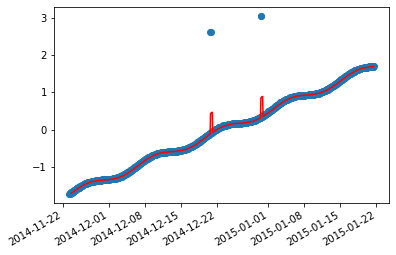

File: A2Benchmarksynthetic_70
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.622465           1          0.163668
2014-12-20 18:00:00    2.622465           1          0.438545
2014-12-30 12:00:00    3.043068           1          0.589636
2014-12-30 13:00:00    3.043068           1          0.862756
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 801.573541, StandardDeviation: 1050.638599


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


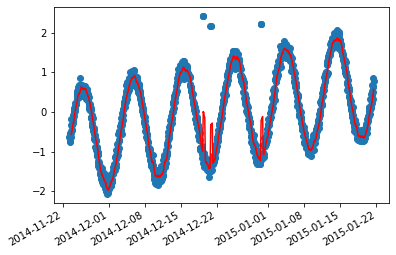

File: A2Benchmarksynthetic_71
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.417565           1         -0.650809
2014-12-19 07:00:00    2.417565           1         -0.318577
2014-12-19 08:00:00    2.417565           1          0.011526
2014-12-20 17:00:00    2.159464           1         -1.051574
2014-12-20 18:00:00    2.159464           1         -0.694199
2014-12-20 19:00:00    2.159464           1         -0.315346
2014-12-30 12:00:00    2.205598           1         -0.885055
2014-12-30 13:00:00    2.205598           1         -0.552317
2014-12-30 14:00:00    2.205598           1         -0.212427
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 70 of 100
Mean: 14842.931340, StandardDeviation: 8603.286780


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


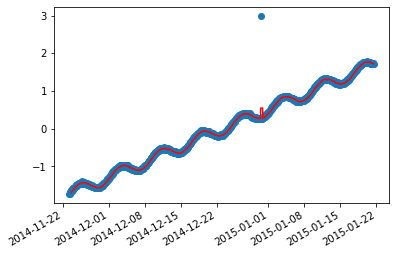

File: A2Benchmarksynthetic_72
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.985381           1          0.547874
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 956.270534, StandardDeviation: 1118.566136


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


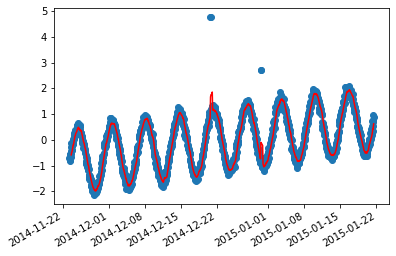

File: A2Benchmarksynthetic_73
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    4.770269           1          1.264662
2014-12-20 18:00:00    4.770269           1          1.667912
2014-12-30 12:00:00    2.703619           1         -0.419114
2014-12-30 13:00:00    2.703619           1         -0.098100
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 10261.456181, StandardDeviation: 6043.947087


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


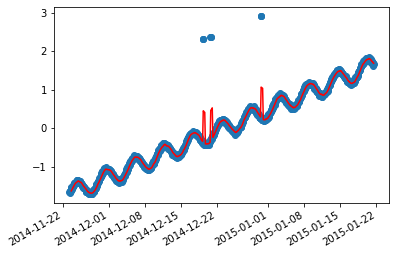

File: A2Benchmarksynthetic_74
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.317184           1         -0.076199
2014-12-19 07:00:00    2.317184           1          0.187137
2014-12-19 08:00:00    2.317184           1          0.450183
2014-12-20 17:00:00    2.359844           1         -0.088579
2014-12-20 18:00:00    2.359844           1          0.186188
2014-12-20 19:00:00    2.359844           1          0.465108
2014-12-30 12:00:00    2.911748           1          0.550697
2014-12-30 13:00:00    2.911748           1          0.807576
2014-12-30 14:00:00    2.911748           1          1.066802
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 556.168299, StandardDeviation: 1032.250432


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


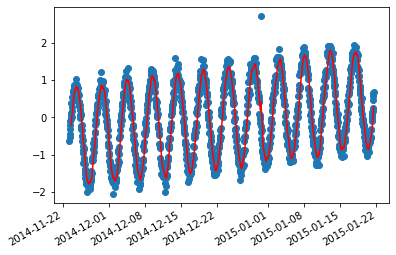

File: A2Benchmarksynthetic_75
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.720477           1          0.423877
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 7759.722960, StandardDeviation: 4605.211318


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


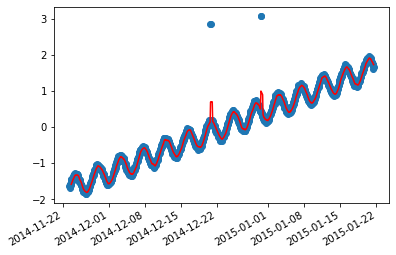

File: A2Benchmarksynthetic_76
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.860542           1          0.413433
2014-12-20 18:00:00    2.860542           1          0.688567
2014-12-30 12:00:00    3.068413           1          0.747255
2014-12-30 13:00:00    3.068413           1          0.995968
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 26401.054954, StandardDeviation: 16295.078570


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


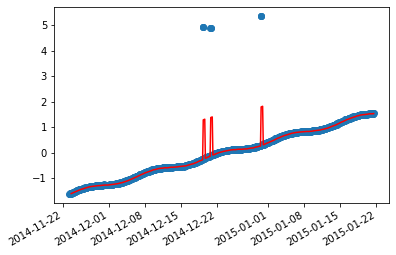

File: A2Benchmarksynthetic_77
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.923091           1          0.252085
2014-12-19 07:00:00    4.923091           1          0.772829
2014-12-19 08:00:00    4.923091           1          1.292698
2014-12-20 17:00:00    4.904308           1          0.374486
2014-12-20 18:00:00    4.904308           1          0.879297
2014-12-20 19:00:00    4.904308           1          1.385856
2014-12-30 12:00:00    5.363630           1          0.781722
2014-12-30 13:00:00    5.363630           1          1.290890
2014-12-30 14:00:00    5.363630           1          1.800472
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 691.874740, StandardDeviation: 1044.758674


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


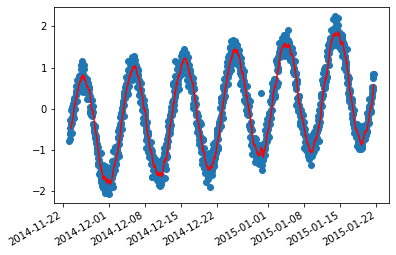

File: A2Benchmarksynthetic_78
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    0.393997           1         -0.938854
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 15368.062661, StandardDeviation: 9186.095179


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


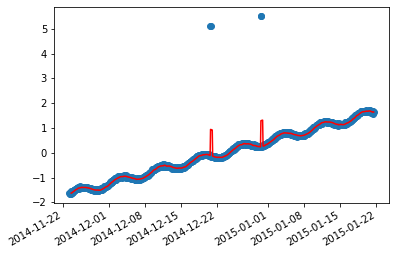

File: A2Benchmarksynthetic_79
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.133387           1          0.418151
2014-12-20 18:00:00    5.133387           1          0.941066
2014-12-30 12:00:00    5.518660           1          0.766659
2014-12-30 13:00:00    5.518660           1          1.292643
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 68.708294, StandardDeviation: 984.090053


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


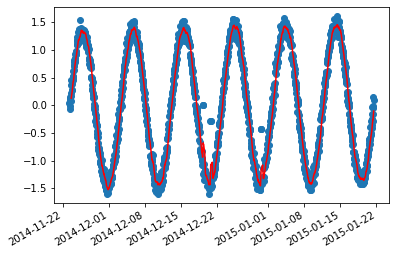

File: A2Benchmarksynthetic_8
threshold:1.2
Outliers:
Empty DataFrame
Columns: [value_data, is_anomaly, value_prediction]
Index: []
truepositives + falsepositives = 0
Mean: 1607.222200, StandardDeviation: 1324.676696


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


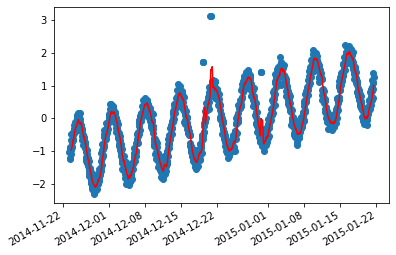

File: A2Benchmarksynthetic_80
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    1.729175           1         -0.474728
2014-12-19 07:00:00    1.729175           1         -0.212194
2014-12-19 08:00:00    1.729175           1          0.039766
2014-12-20 17:00:00    3.133628           1          0.938953
2014-12-20 18:00:00    3.133628           1          1.194580
2014-12-20 19:00:00    3.133628           1          1.477726
2014-12-30 12:00:00    1.423835           1         -0.362945
2014-12-30 13:00:00    1.423835           1         -0.191477
2014-12-30 14:00:00    1.423835           1         -0.006853
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 80 of 100
Mean: 11436.166506, StandardDeviation: 6711.247441


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


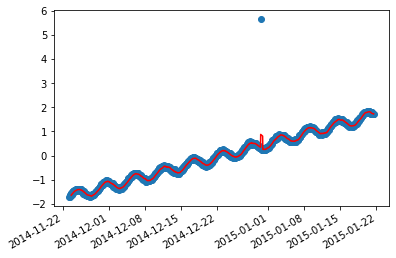

File: A2Benchmarksynthetic_81
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.658333           1           0.87706
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1800.062459, StandardDeviation: 1407.250292


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


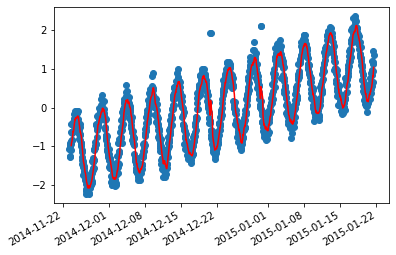

File: A2Benchmarksynthetic_82
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    1.924748           1         -0.006670
2014-12-20 18:00:00    1.924748           1          0.187371
2014-12-30 12:00:00    2.122196           1          0.385749
2014-12-30 13:00:00    2.122196           1          0.542301
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 8016.500290, StandardDeviation: 5055.484515


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


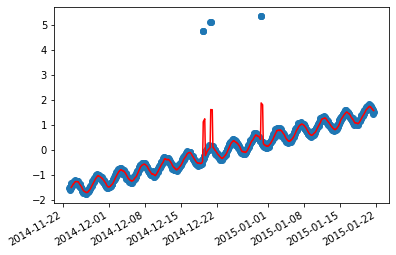

File: A2Benchmarksynthetic_83
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.751598           1          0.079597
2014-12-19 07:00:00    4.751598           1          0.604755
2014-12-19 08:00:00    4.751598           1          1.126658
2014-12-20 17:00:00    5.100007           1          0.601784
2014-12-20 18:00:00    5.100007           1          1.104520
2014-12-20 19:00:00    5.100007           1          1.615565
2014-12-30 12:00:00    5.342319           1          0.911450
2014-12-30 13:00:00    5.342319           1          1.393989
2014-12-30 14:00:00    5.342319           1          1.880717
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 28683.962627, StandardDeviation: 16557.612808


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


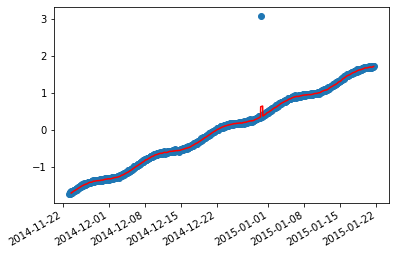

File: A2Benchmarksynthetic_84
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    3.080009           1          0.625992
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2129.056749, StandardDeviation: 1517.746802


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


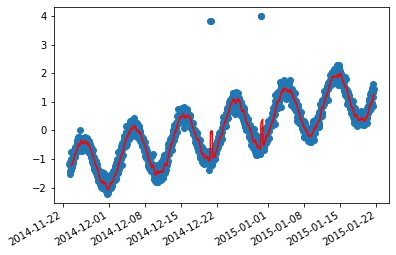

File: A2Benchmarksynthetic_85
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    3.849825           1         -0.553835
2014-12-20 18:00:00    3.849825           1         -0.063810
2014-12-30 12:00:00    4.007059           1         -0.214750
2014-12-30 13:00:00    4.007059           1          0.237989
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 16138.431827, StandardDeviation: 9461.186154


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


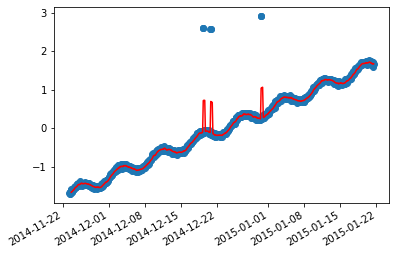

File: A2Benchmarksynthetic_86
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.610746           1          0.172086
2014-12-19 07:00:00    2.610746           1          0.444414
2014-12-19 08:00:00    2.610746           1          0.715203
2014-12-20 17:00:00    2.564485           1          0.156041
2014-12-20 18:00:00    2.564485           1          0.422706
2014-12-20 19:00:00    2.564485           1          0.695182
2014-12-30 12:00:00    2.911057           1          0.511157
2014-12-30 13:00:00    2.911057           1          0.775141
2014-12-30 14:00:00    2.911057           1          1.040940
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1157.094306, StandardDeviation: 1176.287387


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


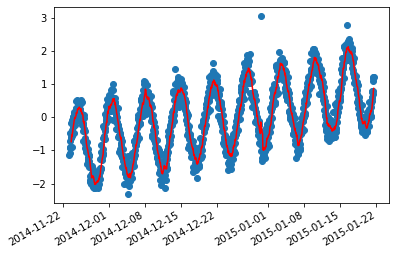

File: A2Benchmarksynthetic_87
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    3.054031           1         -0.142066
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 10896.892199, StandardDeviation: 6380.266954


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


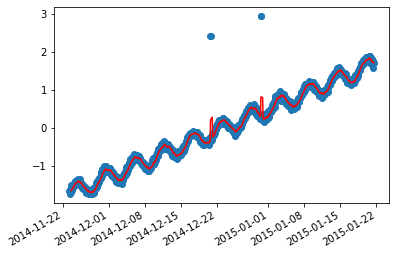

File: A2Benchmarksynthetic_88
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    2.423693           1         -0.065236
2014-12-20 18:00:00    2.423693           1          0.213908
2014-12-30 12:00:00    2.935572           1          0.559626
2014-12-30 13:00:00    2.935572           1          0.816259
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2615.639684, StandardDeviation: 1883.715525


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


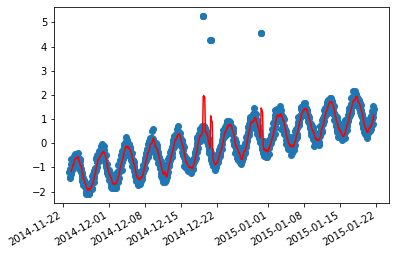

File: A2Benchmarksynthetic_89
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    5.262630           1          0.970139
2014-12-19 07:00:00    5.262630           1          1.454387
2014-12-19 08:00:00    5.262630           1          1.929847
2014-12-20 17:00:00    4.291913           1          0.228896
2014-12-20 18:00:00    4.291913           1          0.665142
2014-12-20 19:00:00    4.291913           1          1.136507
2014-12-30 12:00:00    4.557729           1          0.635448
2014-12-30 13:00:00    4.557729           1          1.040493
2014-12-30 14:00:00    4.557729           1          1.459440
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1922.216751, StandardDeviation: 1465.779085


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


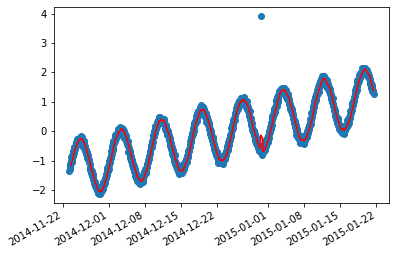

File: A2Benchmarksynthetic_9
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    3.915113           1         -0.131263
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Processing index: 90 of 100
Mean: 9260.052047, StandardDeviation: 5432.702685


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


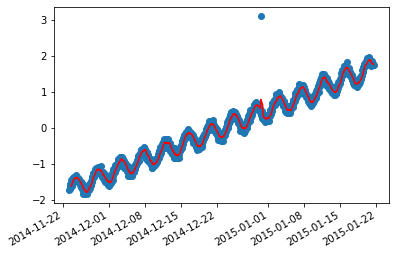

File: A2Benchmarksynthetic_90
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    3.109271           1          0.791956
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 29558.600651, StandardDeviation: 17611.290616


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


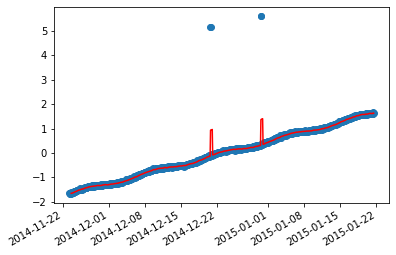

File: A2Benchmarksynthetic_91
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.157234           1          0.407893
2014-12-20 18:00:00    5.157234           1          0.937076
2014-12-30 12:00:00    5.613527           1          0.841340
2014-12-30 13:00:00    5.613527           1          1.370939
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 2949.875475, StandardDeviation: 1884.576544


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


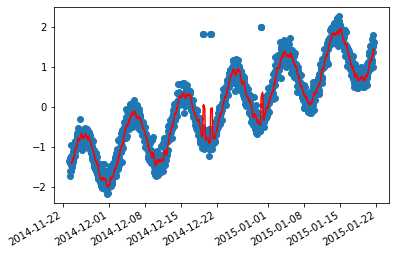

File: A2Benchmarksynthetic_92
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    1.823968           1         -0.468332
2014-12-19 07:00:00    1.823968           1         -0.215757
2014-12-19 08:00:00    1.823968           1          0.030269
2014-12-20 17:00:00    1.818159           1         -0.609970
2014-12-20 18:00:00    1.818159           1         -0.339417
2014-12-20 19:00:00    1.818159           1         -0.034420
2014-12-30 12:00:00    1.994622           1         -0.223817
2014-12-30 13:00:00    1.994622           1          0.005942
2014-12-30 14:00:00    1.994622           1          0.246883
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 18212.607413, StandardDeviation: 10619.940943


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


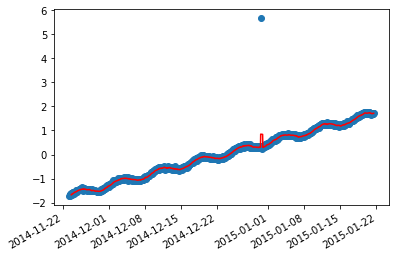

File: A2Benchmarksynthetic_93
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    5.680854           1          0.847817
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 3183.865172, StandardDeviation: 2051.585692


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


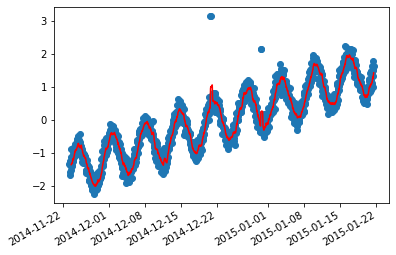

File: A2Benchmarksynthetic_94
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    3.147495           1          0.664789
2014-12-20 18:00:00    3.147495           1          0.948553
2014-12-30 12:00:00    2.163635           1          0.028724
2014-12-30 13:00:00    2.163635           1          0.241898
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 11272.001575, StandardDeviation: 6995.543247


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


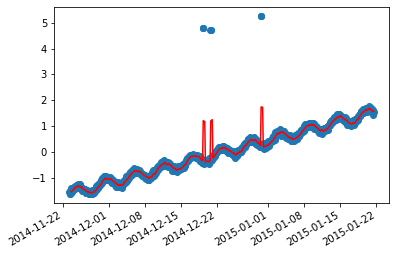

File: A2Benchmarksynthetic_95
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    4.803645           1          0.179117
2014-12-19 07:00:00    4.803645           1          0.691344
2014-12-19 08:00:00    4.803645           1          1.201901
2014-12-20 17:00:00    4.735132           1          0.168262
2014-12-20 18:00:00    4.735132           1          0.678057
2014-12-20 19:00:00    4.735132           1          1.197519
2014-12-30 12:00:00    5.256701           1          0.746731
2014-12-30 13:00:00    5.256701           1          1.240115
2014-12-30 14:00:00    5.256701           1          1.737489
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1698.695896, StandardDeviation: 1393.114383


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


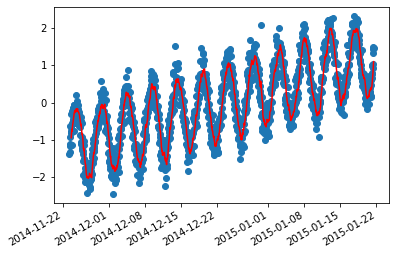

File: A2Benchmarksynthetic_96
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    2.072946           1          0.571567
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 7896.721220, StandardDeviation: 4822.223562


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


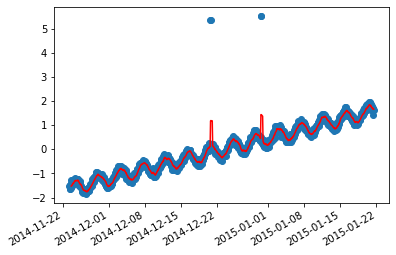

File: A2Benchmarksynthetic_97
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-20 17:00:00    5.373197           1          0.650852
2014-12-20 18:00:00    5.373197           1          1.178574
2014-12-30 12:00:00    5.539767           1          0.949356
2014-12-30 13:00:00    5.539767           1          1.446168
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 31170.980497, StandardDeviation: 18199.274453


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


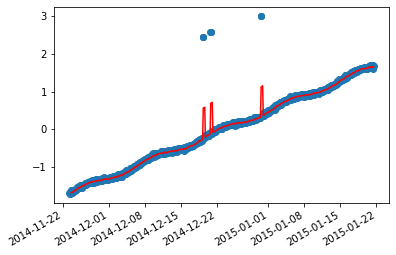

File: A2Benchmarksynthetic_98
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-19 06:00:00    2.462040           1          0.008059
2014-12-19 07:00:00    2.462040           1          0.282654
2014-12-19 08:00:00    2.462040           1          0.555889
2014-12-20 17:00:00    2.582976           1          0.145392
2014-12-20 18:00:00    2.582976           1          0.417707
2014-12-20 19:00:00    2.582976           1          0.693893
2014-12-30 12:00:00    3.006316           1          0.586525
2014-12-30 13:00:00    3.006316           1          0.854422
2014-12-30 14:00:00    3.006316           1          1.123413
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
Mean: 1899.806116, StandardDeviation: 1455.974788


C:\Users\Sanke\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


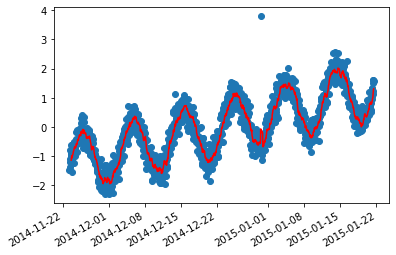

File: A2Benchmarksynthetic_99
threshold:1.2
Outliers:
                     value_data  is_anomaly  value_prediction
timestamp                                                    
2014-12-30 12:00:00    3.802306           1         -0.073445
Precision:  1.0
Recall: 1.0
F1: 1.0
--------------------
MA Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:41.816973


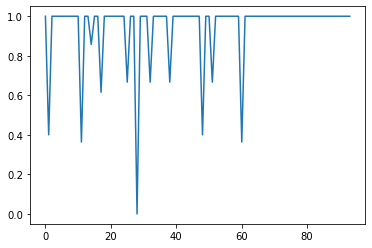

In [94]:
start_time = datetime.now() 
f1_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
#     if index > 30:
#          break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
     # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    #jugaad, change so that standardized is used from here on.
    for i in range(len(df)):
        df['value'].iloc[i] = standardaized[i]
    
    # Tail-rolling average transform
    rolling = df.rolling(window=10)
    rolling_mean = rolling.mean()
        
    # plot original and transformed dataset
    plt.plot_date(df['timestamp'],df['value'])
    plt.plot_date(df['timestamp'],rolling_mean.value,color="red",fmt="-")
    plt.gcf().autofmt_xdate()
    plt.savefig("./MAoutput/" + fname +"MAWindow10")
    plt.show()
    
    MAprediction = pd.concat([df['timestamp'],rolling_mean.value],axis=1)
    MAprediction.set_index('timestamp')
    checkingmatrix = df.set_index('timestamp').join(MAprediction.set_index('timestamp'), on='timestamp',how='inner',lsuffix='_data',rsuffix='_prediction')
    
    manual_threshold = 1.2#1200
    outliers = checkingmatrix[checkingmatrix.value_data >= checkingmatrix.value_prediction + manual_threshold]
    outliers = outliers.drop_duplicates()
    print(f"File: {fname}")
    print(f"threshold:{manual_threshold}")
    print("Outliers:")
    print(outliers)

    not_outliers = checkingmatrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'] #checkingmatrix[checkingmatrix.value_data <= checkingmatrix.value_prediction + manual_threshold]
    #not_outliers = not_outliers.append(rolling_mean[rolling_mean.value > -1*(manual_threshold)])
    not_outliers = not_outliers.drop_duplicates()
    
    truepositives = outliers[outliers.is_anomaly == 1]
    falsepostives = outliers[outliers.is_anomaly == 0]
    truenegatives = not_outliers[not_outliers.is_anomaly == 0]
    falsenegatives = not_outliers[not_outliers.is_anomaly == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    
    
    recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
    print("Recall:", recall)
    recall_plot.append(recall)
    
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        f1_plot.append(0)
        continue
    print("--------------------")

    
end_time=datetime.now()
print(f"MA Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)

In [95]:
print(sum(f1_plot)/len(f1_plot))

0.9432602858134772


# Stationary transformation by differencing

this is to make sure that we actually only catch the outliers instead of every value above or below the threshold

Now that you look at it, it's startlingly familiar,that's cause this is subtracting the TS from its seasonal component taking a timestep of the interval argument, here 1. This is another form of STL Additive DEcomposition done in my STL DEcomposition Notebook.

In [ ]:
#This function removes the trend and seasonsality
#the interval argument could be set to 7 to remove weekly seasonality, 360 for yearly and so on.
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.DataFrame(diff,columns=['value'])

In [ ]:
diffseries = difference(df.value)
print(diffseries)
plt.plot_date(df['timestamp'][:len(df)-1],diffseries) 
plt.gcf().autofmt_xdate()

In [ ]:
diffseries.iloc[650:658]

In [ ]:
diffseries.iloc[890:898]

In [ ]:
diffseries[diffseries.value > manual_threshold]

In [ ]:
diffseries[diffseries.value < (-1)*manual_threshold]

In [ ]:
out = diffseries[diffseries.value > manual_threshold]

In [ ]:
out = out.append(diffseries[diffseries.value < (-1)*manual_threshold])

In [ ]:
out

In [ ]:
# Tail-rolling average transform
rolling2 = diffseries.rolling(window=30)
rolling_mean2 = rolling.mean()

# plot original and transformed dataset
plt.plot_date(df['timestamp'],rolling_mean2.value,color="red",fmt="-")
#rolling_mean.plot(color='red')
plt.show()


In [ ]:
rolling2

In [ ]:
plt.plot_date(df['timestamp'],df['value'])
plt.plot_date(df['timestamp'],rolling_mean2.value,color="red",fmt="-")
plt.gcf().autofmt_xdate()

# Exponential Moving Average

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\\synthetic_1.csv')

window_size = 3
mean = series['value'].ewm(window_size).mean()
std = series['value'].ewm(window_size).std()
std[0] = 0 #the first value turns into NaN because of no data

mean_plus_std = mean + std
mean_minus_std = mean - std

is_outlier = (series['value'] > mean_plus_std) | (series['value'] < mean_minus_std)
outliers = series[is_outlier]

plt.plot(series['value'], c = 'b', label = 'Actual Values')
plt.plot(mean, c = 'r', label = 'Exponentially Weighted Moving Average')
plt.plot(mean_plus_std, 'k--', label = 'Prediction Bounds')
plt.plot(mean_minus_std, 'k--')
plt.scatter(outliers.index, outliers['value'], c = 'r', marker = 'o', s = 120, label = 'Outliers')
plt.gcf().set_size_inches(20,20)
plt.legend()

In [ ]:
outliers

In [ ]:
outliers[outliers.is_anomaly > 0]

#  Moving Average Model vs Moving Average

A moving average model is different from calculating the moving average of the time series. It can be calucalted using the ARMA class from scikitlearn.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

In [34]:
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data),dynamic=False)
print(yhat)

[76.9983608]


# Training an ARMA model. In a loop. With Standardization

In [40]:
history

[-1.4267628389177707,
 -1.5342917013785433,
 -1.3855831726903136,
 -1.372206348546093,
 -1.4220859353344473,
 -1.558643035695526,
 -1.4926681214502484,
 -1.4250236392375994,
 -1.3847345628543826,
 -1.1770646723171212,
 -1.2894700879698053,
 -1.3958519212844636,
 -1.4065634101416253,
 -1.3221823555019927,
 -1.306558206310556,
 -1.29926730579256,
 -1.2309497721470717,
 -1.3056560545148672,
 -1.1854654684194623,
 -1.3025278843952017,
 -1.207765406991421,
 -1.1458296338892677,
 -1.151013587682507,
 -1.0843040667009007,
 -1.1389431743639618,
 -1.0816716519971867,
 -1.0230953845877955,
 -1.1511859280909431,
 -1.1862676835745352,
 -1.0697686407395817,
 -1.0811304923765939,
 -1.0948888064047042,
 -1.076189661115299,
 -1.0836723524858798,
 -0.9658828935251572,
 -0.9236690873403949,
 -0.928125648302871,
 -1.0327185167528667,
 -0.89384982114666,
 -1.0070196263229914,
 -0.8399880650779366,
 -0.9288689442250122,
 -1.0037653472433399,
 -1.0290960977930501,
 -1.0514161937160904,
 -1.0398707690338185,

In [46]:
help(model_fit.predict)
model_fit.predict(len(history), len(history),dynamic=False)

Help on method predict in module statsmodels.tsa.arima_model:

predict(start=None, end=None, exog=None, dynamic=False, **kwargs) method of statsmodels.tsa.arima_model.ARMAResultsWrapper instance
    predict(self, start=None, end=None, exog=None, dynamic=False, **kwargs)
    
    ARMA model in-sample and out-of-sample prediction
    
    Parameters
    ----------
    
    start : int, str, or datetime
        Zero-indexed observation number at which to start forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type.
    end : int, str, or datetime
        Zero-indexed observation number at which to end forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type. However, if the dates index does not
        have a fixed frequency, end must be an integer index if you
        want out of sample prediction.
    exog : array_like, optional
        If the model is an ARMAX and o

ValueError: Length of passed values is 2, index implies 1.

In [36]:
start_time = datetime.now() 
f1_plot = []
rmse_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 10:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
     # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    df['std_value'] = standardaized
    
    # split dataset
    X = df.std_value
    size = int(len(X)*0.5)
    train, test = X[0:size], X[0:len(X)]
    
        
    history = [x for x in train]
    predictions = list()
    
    # train and fit MA model
    for t in range(len(test)):
        # train autoregression
        model = ARMA(train, order=(0, 1))
        model_fit = model.fit(disp=False)
        # make predictions
        output = model_fit.predict(start=len(history), end=len(history)+1, dynamic=False)
        yhat = output.iloc[0]
        predictions.append(yhat)
        obs = X.iloc[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    
        #calculate rmse
    error = sqrt(mean_squared_error(test, predictions))
    print(f'file: {file}')
    print('Test RMSE: %.3f' % error)
    rmse_plot.append(error)

    # plot original and transformed dataset
    plt.plot_date(df['timestamp'],df['std_value'])
    plt.plot_date(df['timestamp'],yhat,color="red",fmt="-")
    plt.gcf().autofmt_xdate()
    plt.savefig("./MAoutput/" + fname +"MAWindow10")
    plt.show()
    
    MAprediction = pd.concat([df['timestamp'],yhat],axis=1)
    MAprediction.rename(columns={0:'value'},inplace=True)
    MAprediction.set_index('timestamp')
    checkingmatrix = df.set_index('timestamp').join(MAprediction.set_index('timestamp'), on='timestamp',how='inner',lsuffix='_data',rsuffix='_prediction')
    
    manual_threshold = 1.2#1200
    outliers = checkingmatrix[checkingmatrix.std_value >= checkingmatrix.value_prediction + manual_threshold]
    outliers = outliers.drop_duplicates()
    print(f"File: {fname}")
    print(f"threshold:{manual_threshold}")
    print("Outliers:")
    print(outliers)
    
    #Line of code to exclude outlier rows and put the rest of the rows into not_outliers
    #Here indicator adds an extra col '_merge' with the value of left_only for rows that are in checking matrix 
    #and right_only for rows only in outliers. and 'both' for rows in both. 
    not_outliers = checkingmatrix.merge(outliers, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'] #checkingmatrix[checkingmatrix.value_data <= checkingmatrix.value_prediction + manual_threshold]
    #not_outliers = not_outliers.append(rolling_mean[rolling_mean.value > -1*(manual_threshold)])
    not_outliers = not_outliers.drop_duplicates()
    
    truepositives = outliers[outliers.is_anomaly == 1]
    falsepostives = outliers[outliers.is_anomaly == 0]
    truenegatives = not_outliers[not_outliers.is_anomaly == 0]
    falsenegatives = not_outliers[not_outliers.is_anomaly == 1]
    
    if(len(truepositives) + len(falsepostives) > 0):
        precision = len(truepositives)/(len(truepositives) + len(falsepostives))
        print("Precision: ", precision)
        precision_plot.append(precision)
    else:
        print("truepositives + falsepositives = 0")
        continue
    
    
    if(len(truepositives) + len(falsenegatives) > 0):
        recall = len(truepositives)/(len(truepositives) + len(falsenegatives))
        print("Recall:", recall)
        recall_plot.append(recall)
    else:
        print("truepositives + falsenegatives = 0")
        continue   
    
    if(precision + recall > 0):
        f1 = 2*(precision * recall)/(precision + recall)
        print("F1:",f1)
        f1_plot.append(f1)
    else:
        print("precision + recall = 0")
        f1_plot.append(0)
        continue
    print("--------------------")

    
end_time=datetime.now()
print(f"MA Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)
print(f"Average F1 score over {index} runs is = {sum(f1_plot)/len(f1_plot)}")

Processing index: 0 of 100
Mean: 4471.669226, StandardDeviation: 2925.391670


ValueError: Length of passed values is 3, index implies 2.

In [25]:
type(output), output

(pandas.core.series.Series,
 710   -0.658335
 dtype: float64)

In [7]:
X = df_indexed.value
print("\n\nX\n",X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
print("\ntrain\n",train,"\ntest\n",test)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
 	model = ARMA(history, order=(0, 1))
 	model_fit = model.fit(disp=0)
 	output = model_fit.forecast()
 	yhat = output[0]
 	predictions.append(yhat)
 	obs = test.iloc[t]
 	history.append(obs)
 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig1 = plt.figure()
plt.plot(test.tolist())
plt.plot(predictions, color='red')
plt.show()



X
 timestamp
2014-11-23 07:00:00     410.760396
2014-11-23 08:00:00     -28.995923
2014-11-23 09:00:00     572.823138
2014-11-23 10:00:00     624.359629
2014-11-23 11:00:00     418.542194
                          ...     
2015-01-21 07:00:00    7982.630558
2015-01-21 08:00:00    6895.250799
2015-01-21 09:00:00    7770.417227
2015-01-21 10:00:00    8193.975991
2015-01-21 11:00:00    7768.060826
Name: value, Length: 1421, dtype: float64

train
 timestamp
2014-11-23 07:00:00     410.760396
2014-11-23 08:00:00     -28.995923
2014-11-23 09:00:00     572.823138
2014-11-23 10:00:00     624.359629
2014-11-23 11:00:00     418.542194
                          ...     
2015-01-01 03:00:00    4268.651685
2015-01-01 04:00:00    3945.696642
2015-01-01 05:00:00    4163.131717
2015-01-01 06:00:00    4364.972194
2015-01-01 07:00:00    4371.720293
Name: value, Length: 937, dtype: float64 
test
 timestamp
2015-01-01 08:00:00    4667.327031
2015-01-01 09:00:00    4266.610393
2015-01-01 10:00:00    4325

predicted=3605.013722, expected=6048.503971
predicted=4776.730367, expected=7088.461830
predicted=4683.367494, expected=7178.331337
predicted=4823.556926, expected=6462.391839
predicted=4197.456712, expected=7045.364296
predicted=5092.620237, expected=6508.248563
predicted=4041.084887, expected=7494.615987
predicted=5545.816398, expected=7048.519404
predicted=4112.579109, expected=7024.602327
predicted=5154.933308, expected=7001.422420
predicted=4373.155828, expected=6749.145493
predicted=4768.471158, expected=7455.268613
predicted=5002.318840, expected=7216.226463
predicted=4659.852960, expected=7404.379301
predicted=5056.058058, expected=7011.926345
predicted=4478.599030, expected=7158.915051
predicted=5018.695098, expected=7393.989411
predicted=4797.133638, expected=6772.954101
predicted=4506.293574, expected=7045.245588
predicted=4927.878344, expected=7161.258186
predicted=4705.999914, expected=7552.791718
predicted=5165.537010, expected=7072.138171
predicted=4472.611825, expected=

predicted=5219.492830, expected=6683.003721
predicted=4652.171933, expected=7273.311700
predicted=5551.226337, expected=6350.814323
predicted=4143.348984, expected=6787.378524
predicted=5572.864617, expected=6729.062743
predicted=4423.861454, expected=6541.888034
predicted=5170.903595, expected=7479.219661
predicted=5321.080471, expected=7340.442652
predicted=5102.067884, expected=6406.033791
predicted=4550.371373, expected=6657.108713
predicted=5174.795624, expected=6563.575719
predicted=4620.938402, expected=6545.971763
predicted=5039.043894, expected=6505.439019
predicted=4685.905945, expected=6079.213479
predicted=4631.821112, expected=5547.676355
predicted=4263.114894, expected=6048.991846
predicted=4939.492287, expected=6359.486238
predicted=4658.036332, expected=5910.820636
predicted=4530.613122, expected=6156.590995
predicted=4822.013576, expected=5757.324521
predicted=4287.831808, expected=6038.531898
predicted=4922.299376, expected=6082.771689
predicted=4466.594370, expected=

NameError: name 'mean_squared_error' is not defined